# Import 

In [47]:
# Data Processing and Visualization Libraries / Библиотеки обработки данных и визуализации
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#  Data Modelling Libraries / Библиотеки моделирования данных
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)


from sklearn.metrics import (confusion_matrix, accuracy_score) 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
from collections import Counter


sns.set(style = 'white' , context = 'notebook', palette = 'deep')
warnings.filterwarnings('ignore', category = DeprecationWarning)
%matplotlib inline

# Загрузка обучеющей и тестовой выборок

In [48]:
# load the datasets 

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
target = train['Survived']

# concat these two datasets, this will come handy while processing the data / 
#объедините эти два набора данных, это пригодится при обработке данных

dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

# separately store ID of test datasets, 
# this will be using at the end of the task to predict.
#отдельно храните идентификатор тестовых наборов данных,
# это будет использоваться в конце задачи для прогнозирования.

TestPassengerID = test['PassengerId']
TestPassengerID

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [49]:
dataset=dataset.drop(['PassengerId','Survived'], axis = 1)
dataset.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Сведения о размерах выборок

In [50]:
print("Размеры обучающей выборки",train.shape)
print("Размеры тестовой выборки ",test.shape)

Размеры обучающей выборки (891, 12)
Размеры тестовой выборки  (418, 11)


## Исследование данных

In [51]:
dataset["Embarked"] = dataset["Embarked"].fillna("S")

In [52]:
dataset

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [53]:
# first 5 records
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Описание признаков с Kagle

=PassengerId. Unique identification of the passenger. It shouldn't be necessary for the machine learning model.
==Пассажиры. Уникальная идентификация пассажира. Это не должно быть необходимо для модели машинного обучения.

=Survived. Survival (0 = No, 1 = Yes). Binary variable that will be our target variable.
==Выжил. Выживание (0 = Нет, 1 = Да). Двоичная переменная, которая будет нашей целевой переменной.

=Pclass. Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd). Ready to go.
==Класс. Класс билета (1 = 1-й, 2 = 2-й, 3 = 3-й). Готов к выходу.

=Name. Name of the passenger. We need to parse before using it.
==Имя. Имя пассажира. Нам нужно проанализировать, прежде чем использовать его.

=Sex. Gender Categorical variable that should be encoded. We can use dummy variable to encode it.
== Пол. Гендерная категориальная переменная, которая должна быть закодирована. Мы можем использовать фиктивную переменную для ее кодирования.

=Age. Age in years.
==Возраст. Возраст в годах

=SibSp. Siblings / Spouses aboard the Titanic.
== Подсп. Братья и сестры / Супруги на борту "Титаника"

=Parch. Parents / Children aboard the Titanic.
== Пергамент. Родители / Дети на борту "Титаника"

=Ticket. Ticket number. Big mess.
== Билет. Номер билета. Большой беспорядок

=Fare. Passenger fare.
== Плата за проезд. Стоимость проезда для пассажиров

=Cabin. Cabin number.
==Каюта. Номер каюты

=Embarked. Port of Embarkation , C = Cherbourg, Q = Queenstown, S = Southampton.
==Встал. Порт посадки , C = Шербур, Q = Квинстаун, S = Саутгемптон.

=Categorical feature that should be encoded. We can use feature mapping or make dummy vairables for it.
==Категориальный признак, который должен быть закодирован. Мы можем использовать отображение объектов или создавать для него фиктивные переменные.

In [54]:
# using info method we can get quick overview of the data sets
# используя метод информации, мы можем получить быстрый обзор наборов данных
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Анализ пропусков обучающей выборке

In [55]:
# функция поиска недостающих данных
def find_missing_data(data):
    Total = data.isnull().sum().sort_values(ascending = False)
    Percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
    
    return pd.concat([Total, Percentage] , axis = 1 , keys = ['Total' , 'Percent'])

In [56]:
find_missing_data(train)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


Обнаруживается большое колличество пропусков по размещению пассажиров.
У многих отсутвуют данные о возрасте
Лишь у двоих неизвестен порт отправления.
Это связывается с большим количеством пассажиров низкого класса, которые не учитывались при покупке билетов и регистрации

<AxesSubplot:>

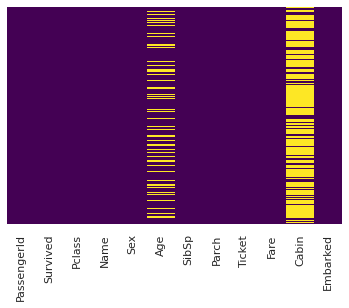

In [57]:
# визуализация пропуков в обучающей выборке
# checking only train set - visualize
sns.heatmap(train.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')

## Анализ пропусков тестовой выборке

In [58]:
find_missing_data(test)

,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


In [59]:
#Обнаруживается большое колличество пропусков по размещению пассажиров.
#У многих отсутвуют данные о возрасте
#Лишь у одного неизветсна плата за билет

## Анализ пропусков в общем наборе данных

In [60]:
find_missing_data(dataset)

,Total,Percent
Cabin,1014,0.774637
Age,263,0.200917
Fare,1,0.000764
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Embarked,0,0.000000


<AxesSubplot:>

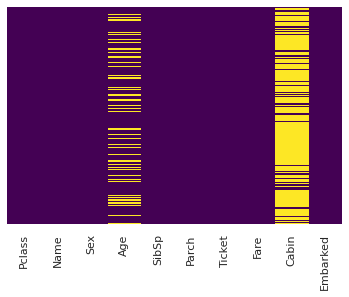

In [61]:
# визуализация пропуков в общем наборе данных
# checking only datasets set
sns.heatmap(dataset.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')

## Анализ принаков

In [62]:
#dataset = dataset.drop(['PassengerId','Ticket', 'Cabin'], axis = 1)
dataset = dataset.drop(['Cabin','Ticket'], axis = 1)
dataset.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


<AxesSubplot:>

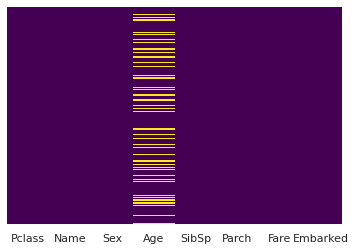

In [63]:
# визуализация пропуков в общем наборе данных
# checking only datasets set
sns.heatmap(dataset.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')

### Анализ признаков: численных и вещественных

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB


In [65]:
numeric_cols = ['Age', 'Fare']
categorical_cols = ['Name', 'Sex', 'Embarked']
print('численные признаки:     ', numeric_cols)
print('вещественные признаки:  ', categorical_cols)

численные признаки:      ['Age', 'Fare']
вещественные признаки:   ['Name', 'Sex', 'Embarked']


### Обработка пропущенных значений.

<AxesSubplot:>

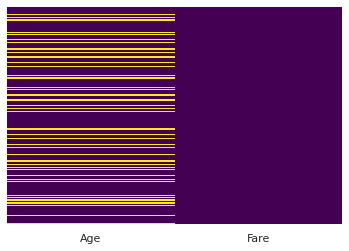

In [66]:
# визуализация пропуков в общем наборе данных до заполнения
# checking only datasets set
sns.heatmap(dataset[numeric_cols].isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')

In [67]:
# заполнем пропуски численных признаков средним значением по признаку

X_real_mean = dataset[numeric_cols].fillna(round(np.mean(dataset[numeric_cols]),0))


In [68]:
X_real_mean

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
1304,30.0,8.0500
1305,39.0,108.9000
1306,38.5,7.2500
1307,30.0,8.0500


In [69]:
# добавим численные признаки в общий набор данных
dataset[numeric_cols]=X_real_mean[numeric_cols]

До заполнения  (1309, 2)
После заполенения  (1309, 8)


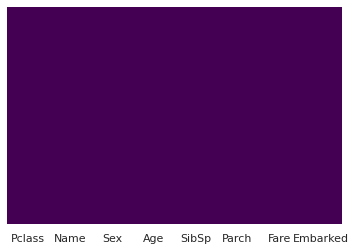

In [70]:
# визуализация пропуков в общем наборе данных
# checking only datasets set
sns.heatmap(dataset.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')

print("До заполнения ",dataset[numeric_cols].shape)
print("После заполенения ",dataset.shape)

## Преобразование категориальных признаков.

In [71]:
# закодируем котегориальные признаки 

dataset.loc[dataset['Sex'] == 'male', 'Sex'] = int(0)
dataset.loc[dataset['Sex'] == 'female', 'Sex'] = int(1)
dataset.loc[dataset['Embarked'] == 'S', 'Embarked'] = 0
dataset.loc[dataset['Embarked'] == 'C', 'Embarked'] = 1
dataset.loc[dataset['Embarked'] == 'Q', 'Embarked'] = 2
dataset.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


In [72]:
#pd.to_numeric(dataset.Sex, downcast='integer')
#pd.to_numeric(dataset.Embarked, downcast='integer')

In [73]:
dataset[['Sex', 'Embarked']] = dataset[['Sex', 'Embarked']].astype(float)

In [74]:
# проверим тип закодированных признаков
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   float64
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 81.9+ KB


## Обработка имен пассажиров

In [75]:
# Get Title from Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]

# add dataset_title to the main dataset named 'Title'
dataset["Title"] = pd.Series(dataset_title)

# count
dataset["Title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Lady              1
Don               1
Jonkheer          1
Dona              1
Capt              1
Mme               1
Sir               1
the Countess      1
Name: Title, dtype: int64

In [76]:
# Convert to categorical values Title 
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess',
                                             'Capt', 'Col','Don', 'Dr', 
                                             'Major', 'Rev', 'Sir', 'Jonkheer',
                                             'Dona'], 'Rare')

dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 ,
                                         "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, 
                                         "Rare":3})

dataset["Title"] = dataset["Title"].astype(int)

# Drop Name variable
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   float64
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   float64
 7   Title     1309 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 81.9 KB


## Family size

In [78]:
# Create a family size descriptor from SibSp and Parch
dataset["Famize"] = dataset["SibSp"] + dataset["Parch"] + 1

# Drop SibSp and Parch variables
dataset.drop(labels = ["SibSp",'Parch'], axis = 1, inplace = True)
dataset

,Pclass,Sex,Age,Fare,Embarked,Title,Famize
0,3,0.0,22.0,7.2500,0.0,2,2
1,1,1.0,38.0,71.2833,1.0,1,2
2,3,1.0,26.0,7.9250,0.0,1,1
3,1,1.0,35.0,53.1000,0.0,1,2
4,3,0.0,35.0,8.0500,0.0,2,1
...,...,...,...,...,...,...,...
1304,3,0.0,30.0,8.0500,0.0,2,1
1305,1,1.0,39.0,108.9000,1.0,3,1
1306,3,0.0,38.5,7.2500,0.0,2,1
1307,3,0.0,30.0,8.0500,0.0,2,1


In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   float64
 2   Age       1309 non-null   float64
 3   Fare      1309 non-null   float64
 4   Embarked  1309 non-null   float64
 5   Title     1309 non-null   int64  
 6   Famize    1309 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 71.7 KB


# Подготовка обучающей и тестовой выборок

In [80]:
# Separate train dataset and test dataset
train_new = dataset[:len(train)]
print('размер обучающей выборки ^',train_new.shape)
test_new = dataset[len(train):]

print('размер тестовой выборки ^',test_new.shape)
test_new


размер обучающей выборки ^ (891, 7)
размер тестовой выборки ^ (418, 7)


,Pclass,Sex,Age,Fare,Embarked,Title,Famize
891,3,0.0,34.5,7.8292,2.0,2,1
892,3,1.0,47.0,7.0000,0.0,1,2
893,2,0.0,62.0,9.6875,2.0,2,1
894,3,0.0,27.0,8.6625,0.0,2,1
895,3,1.0,22.0,12.2875,0.0,1,3
...,...,...,...,...,...,...,...
1304,3,0.0,30.0,8.0500,0.0,2,1
1305,1,1.0,39.0,108.9000,1.0,3,1
1306,3,0.0,38.5,7.2500,0.0,2,1
1307,3,0.0,30.0,8.0500,0.0,2,1


In [81]:
# Separate train features and label 
Y_train = target
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [82]:
X_train = train_new
X_train

,Pclass,Sex,Age,Fare,Embarked,Title,Famize
0,3,0.0,22.0,7.2500,0.0,2,2
1,1,1.0,38.0,71.2833,1.0,1,2
2,3,1.0,26.0,7.9250,0.0,1,1
3,1,1.0,35.0,53.1000,0.0,1,2
4,3,0.0,35.0,8.0500,0.0,2,1
...,...,...,...,...,...,...,...
886,2,0.0,27.0,13.0000,0.0,3,1
887,1,1.0,19.0,30.0000,0.0,1,1
888,3,1.0,30.0,23.4500,0.0,1,4
889,1,0.0,26.0,30.0000,1.0,2,1


In [83]:
test_new

,Pclass,Sex,Age,Fare,Embarked,Title,Famize
891,3,0.0,34.5,7.8292,2.0,2,1
892,3,1.0,47.0,7.0000,0.0,1,2
893,2,0.0,62.0,9.6875,2.0,2,1
894,3,0.0,27.0,8.6625,0.0,2,1
895,3,1.0,22.0,12.2875,0.0,1,3
...,...,...,...,...,...,...,...
1304,3,0.0,30.0,8.0500,0.0,2,1
1305,1,1.0,39.0,108.9000,1.0,3,1
1306,3,0.0,38.5,7.2500,0.0,2,1
1307,3,0.0,30.0,8.0500,0.0,2,1


In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


In [85]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 815 to 684
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    801 non-null    int64  
 1   Sex       801 non-null    float64
 2   Age       801 non-null    float64
 3   Fare      801 non-null    float64
 4   Embarked  801 non-null    float64
 5   Title     801 non-null    int64  
 6   Famize    801 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 50.1 KB


## Classifier

## Building the XGBoost Model

In [86]:
import xgboost as xgb


xg_clf = xgb.XGBClassifier(objective ='binary:logistic',
                           use_label_encoder=False,
                           colsample_bytree=0.4,
                           learning_rate = 0.1,
                          max_depth = 6,  
                          n_estimators = 26
                          )

In [87]:
xg_clf.fit(X_train,Y_train)

[20:41:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=26, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [88]:
K_fold = 10

In [89]:
# Logistic Regression
#
 #Log_Model = LogisticRegression(C=1)
#scores = cross_val_score(Log_Model, X_train, Y_train, cv=K_fold, 
 
#print(scores)
#round(np.mean(scores)*100, 2)

In [90]:
# Random Forest Classifier Model
#
RFC_model = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(RFC_model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.85185185 0.7875     0.8125     0.85       0.8125     0.8625
 0.8        0.775      0.775      0.8375    ]


81.64

In [91]:
# Gaussian Naive Bayes
GNB_Model = GaussianNB()

scores = cross_val_score(GNB_Model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.80246914 0.825      0.7375     0.8375     0.85       0.7625
 0.8375     0.7875     0.8625     0.8375    ]


81.4

In [92]:
# Support Vector Machine
SVM_Model = SVC()

scores = cross_val_score(SVM_Model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.74074074 0.675      0.6        0.725      0.6875     0.725
 0.6375     0.65       0.675      0.65      ]


67.66

# Hyperparameter Tuning

In [93]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {
              'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01, 0.001],
              'max_depth': [4, 8,16],
              'min_samples_leaf': [100,150,250],
              'max_features': [0.3, 0.1]
              }

gsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv=K_fold, 
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


0.8364506172839506

In [94]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


0.8439506172839506

In [95]:
# LogisticRegression Parameters tunning 
LRM = LogisticRegression()

## Search grid for optimal parameters
lr_param_grid = {"penalty" : ["l2"],
              "tol" : [0.0001,0.0002,0.0003],
              "max_iter": [100,200,300],
              "C" :[0.01, 0.1, 1, 10, 100],
              "intercept_scaling": [1, 2, 3, 4],
              "solver":['liblinear'],
              "verbose":[1]}


gsLRM = GridSearchCV(LRM, param_grid = lr_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLRM.fit(X_train,Y_train)
LRM_best = gsLRM.best_estimator_

# Best score
gsLRM.best_score_

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
iter  1 act 4.703e-01 pre 4.385e-01 delta 2.898e-02 f 4.998e+00 |g| 3.265e+01 CG   2
cg reaches trust region boundary
iter  2 act 6.668e-02 pre 6.468e-02 delta 5.717e-02 f 4.527e+00 |g| 8.353e+00 CG   3
cg reaches trust region boundary
iter  3 act 8.248e-02 pre 8.255e-02 delta 2.287e-01 f 4.461e+00 |g| 2.086e+00 CG   2
cg reaches trust region boundary
iter  4 act 2.027e-01 pre 2.004e-01 delta 3.403e-01 f 4.378e+00 |g| 2.144e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.331e-01 pre 1.368e-01 delta 3.403e-01 f 4.175e+00 |g| 1.158e+00 CG   4
iter  6 act 3.529e-02 pre 3.457e-02 delta 3.403e-01 f 4.042e+00 |g| 7.456e-01 CG   4
iter  7 act 3.207e-04 pre 3.206e-04 delta 3.403e-01 f 4.007e+00 |g| 9.393e-02 CG   4
iter  8 act 2.137e-05 pre 2.137e-05 delta 3.403e-01 f 4.007e+00 |g| 9.355e-03 CG   5
iter  1 act 4.689e-01 pre 4.376e-01 delta 2.840e-02 f 4.991e+00 |g| 3.323e+01 CG   2
cg reaches trust region boundary
iter 

iter  7 act 4.502e-04 pre 4.501e-04 delta 4.729e-01 f 3.938e+00 |g| 8.758e-02 CG   4
iter  8 act 6.726e-06 pre 6.724e-06 delta 4.729e-01 f 3.938e+00 |g| 7.257e-03 CG   4
iter  1 act 4.703e-01 pre 4.385e-01 delta 2.898e-02 f 4.998e+00 |g| 3.265e+01 CG   2
iter  1 act 4.760e-01 pre 4.421e-01 delta 2.832e-02 f 4.998e+00 |g| 3.387e+01 CG   2
cg reaches trust region boundary
iter  2 act 6.972e-02 pre 6.663e-02 delta 5.139e-02 f 4.522e+00 |g| 9.469e+00 CG   3
cg reaches trust region boundary
iter  3 act 4.823e-02 pre 4.587e-02 delta 6.450e-02 f 4.452e+00 |g| 2.309e+00 CG   3
cg reaches trust region boundary
iter  4 act 9.709e-02 pre 9.949e-02 delta 1.181e-01 f 4.404e+00 |g| 5.432e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.092e-01 pre 1.089e-01 delta 3.589e-01 f 4.307e+00 |g| 1.582e+00 CG   3
cg reaches trust region boundary
iter  6 act 1.749e-01 pre 1.750e-01 delta 4.500e-01 f 4.197e+00 |g| 1.267e+00 CG   3
iter  7 act 1.691e-02 pre 1.688e-02 delta 4.500e-01 f 4.022e+00 |g| 6.

iter  1 act 4.689e-01 pre 4.376e-01 delta 2.840e-02 f 4.991e+00 |g| 3.323e+01 CG   2
cg reaches trust region boundary
iter  2 act 6.474e-02 pre 6.244e-02 delta 5.397e-02 f 4.522e+00 |g| 8.819e+00 CG   3
cg reaches trust region boundary
iter  3 act 6.589e-02 pre 6.525e-02 delta 1.412e-01 f 4.457e+00 |g| 2.106e+00 CG   2
cg reaches trust region boundary
iter  4 act 1.505e-01 pre 1.516e-01 delta 3.032e-01 f 4.391e+00 |g| 3.425e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.783e-01 pre 1.776e-01 delta 4.728e-01 f 4.241e+00 |g| 1.441e+00 CG   3
iter  6 act 4.026e-02 pre 4.028e-02 delta 4.728e-01 f 4.062e+00 |g| 4.675e-01 CG   4
iter  7 act 5.388e-04 pre 5.387e-04 delta 4.728e-01 f 4.022e+00 |g| 8.307e-02 CG   4
iter  1 act 4.837e-01 pre 4.506e-01 delta 2.851e-02 f 4.998e+00 |g| 3.430e+01 CG   2
cg reaches trust region boundary
iter  2 act 6.438e-02 pre 6.195e-02 delta 5.346e-02 f 4.514e+00 |g| 9.132e+00 CG   3
cg reaches trust region boundary
iter  3 act 5.047e-02 pre 4.860e-02 d

cg reaches trust region boundary
iter  5 act 1.769e-01 pre 1.760e-01 delta 4.596e-01 f 4.203e+00 |g| 1.177e+00 CG   3
iter  6 act 4.704e-02 pre 4.715e-02 delta 4.596e-01 f 4.026e+00 |g| 4.873e-01 CG   4
iter  7 act 5.497e-04 pre 5.496e-04 delta 4.596e-01 f 3.979e+00 |g| 1.094e-01 CG   4
iter  8 act 1.507e-05 pre 1.507e-05 delta 4.596e-01 f 3.978e+00 |g| 9.315e-03 CG   5
iter  1 act 4.703e-01 pre 4.385e-01 delta 2.898e-02 f 4.998e+00 |g| 3.265e+01 CG   2
cg reaches trust region boundary
iter  2 act 6.668e-02 pre 6.468e-02 delta 5.717e-02 f 4.527e+00 |g| 8.353e+00 CG   3
cg reaches trust region boundary
iter  3 act 8.248e-02 pre 8.255e-02 delta 2.287e-01 f 4.461e+00 |g| 2.086e+00 CG   2
cg reaches trust region boundary
iter  4 act 2.027e-01 pre 2.004e-01 delta 3.403e-01 f 4.378e+00 |g| 2.144e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.331e-01 pre 1.368e-01 delta 3.403e-01 f 4.175e+00 |g| 1.158e+00 CG   4
iter  6 act 3.529e-02 pre 3.457e-02 delta 3.403e-01 f 4.042e+00 |g| 7.

iter  6 act 1.490e-01 pre 1.500e-01 delta 4.137e-01 f 4.182e+00 |g| 1.089e+00 CG   3
iter  7 act 8.788e-03 pre 8.661e-03 delta 4.137e-01 f 4.033e+00 |g| 5.346e-01 CG   4
iter  8 act 5.952e-04 pre 5.950e-04 delta 4.137e-01 f 4.024e+00 |g| 6.229e-02 CG   5
iter  1 act 5.201e-01 pre 4.786e-01 delta 3.011e-02 f 4.998e+00 |g| 3.523e+01 CG   2
cg reaches trust region boundary
iter  2 act 7.965e-02 pre 7.535e-02 delta 5.100e-02 f 4.478e+00 |g| 1.097e+01 CG   3
cg reaches trust region boundary
iter  3 act 6.171e-02 pre 6.095e-02 delta 1.239e-01 f 4.398e+00 |g| 2.617e+00 CG   3
cg reaches trust region boundary
iter  4 act 1.322e-01 pre 1.331e-01 delta 2.940e-01 f 4.336e+00 |g| 3.074e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.823e-01 pre 1.815e-01 delta 4.880e-01 f 4.204e+00 |g| 1.177e+00 CG   3
iter  6 act 5.214e-02 pre 5.223e-02 delta 4.880e-01 f 4.022e+00 |g| 5.508e-01 CG   4
iter  7 act 6.459e-04 pre 6.458e-04 delta 4.880e-01 f 3.970e+00 |g| 1.069e-01 CG   4
iter  8 act 1.384e

cg reaches trust region boundary
iter  6 act 1.442e-01 pre 1.452e-01 delta 4.076e-01 f 4.145e+00 |g| 1.027e+00 CG   4
iter  7 act 7.098e-03 pre 7.017e-03 delta 4.076e-01 f 4.001e+00 |g| 4.884e-01 CG   4
iter  8 act 4.881e-04 pre 4.879e-04 delta 4.076e-01 f 3.994e+00 |g| 5.318e-02 CG   5
iter  9 act 5.420e-07 pre 5.420e-07 delta 4.076e-01 f 3.993e+00 |g| 1.956e-03 CG   4
iter  1 act 5.432e-01 pre 4.980e-01 delta 3.078e-02 f 4.998e+00 |g| 3.622e+01 CG   2
cg reaches trust region boundary
iter  2 act 8.452e-02 pre 7.982e-02 delta 5.118e-02 f 4.454e+00 |g| 1.163e+01 CG   3
cg reaches trust region boundary
iter  3 act 6.367e-02 pre 6.300e-02 delta 1.338e-01 f 4.370e+00 |g| 2.753e+00 CG   3
cg reaches trust region boundary
iter  4 act 1.418e-01 pre 1.427e-01 delta 3.185e-01 f 4.306e+00 |g| 2.886e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.924e-01 pre 1.917e-01 delta 4.990e-01 f 4.164e+00 |g| 1.203e+00 CG   3
iter  6 act 4.225e-02 pre 4.228e-02 delta 4.990e-01 f 3.972e+00 |g| 4.

iter  1 act 4.693e-01 pre 4.380e-01 delta 2.834e-02 f 4.991e+00 |g| 3.332e+01 CG   2
cg reaches trust region boundary
iter  2 act 6.480e-02 pre 6.248e-02 delta 5.351e-02 f 4.521e+00 |g| 8.850e+00 CG   3
cg reaches trust region boundary
iter  3 act 6.403e-02 pre 6.333e-02 delta 1.301e-01 f 4.457e+00 |g| 2.112e+00 CG   2
cg reaches trust region boundary
iter  1 act 5.059e-01 pre 4.679e-01 delta 3.038e-02 f 4.998e+00 |g| 3.359e+01 CG   2
iter  4 act 1.406e-01 pre 1.418e-01 delta 2.889e-01 f 4.393e+00 |g| 3.525e+00 CG   3
cg reaches trust region boundary
iter  2 act 7.467e-02 pre 7.157e-02 delta 5.485e-02 f 4.492e+00 |g| 9.366e+00 CG   3
cg reaches trust region boundary
cg reaches trust region boundary
iter  3 act 4.941e-02 pre 4.663e-02 delta 6.494e-02 f 4.417e+00 |g| 2.262e+00 CG   2
iter  5 act 1.921e-01 pre 1.918e-01 delta 5.406e-01 f 4.252e+00 |g| 1.756e+00 CG   3
cg reaches trust region boundary
iter  4 act 9.719e-02 pre 9.974e-02 delta 1.109e-01 f 4.368e+00 |g| 5.522e+00 CG   3
cg r

cg reaches trust region boundary
iter  2 act 6.695e-02 pre 6.491e-02 delta 5.662e-02 f 4.527e+00 |g| 8.403e+00 CG   3
cg reaches trust region boundary
iter  3 act 8.116e-02 pre 8.123e-02 delta 2.265e-01 f 4.460e+00 |g| 2.097e+00 CG   2
cg reaches trust region boundary
iter  4 act 1.961e-01 pre 1.938e-01 delta 3.307e-01 f 4.379e+00 |g| 2.076e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.536e-01 pre 1.570e-01 delta 3.564e-01 f 4.183e+00 |g| 1.265e+00 CG   4
iter  6 act 4.338e-02 pre 4.261e-02 delta 3.564e-01 f 4.029e+00 |g| 7.982e-01 CG   4
iter  7 act 2.866e-04 pre 2.865e-04 delta 3.564e-01 f 3.986e+00 |g| 1.189e-01 CG   4
iter  8 act 3.874e-06 pre 3.874e-06 delta 3.564e-01 f 3.985e+00 |g| 3.681e-03 CG   5
iter  1 act 4.708e-01 pre 4.391e-01 delta 2.893e-02 f 4.998e+00 |g| 3.274e+01 CG   2
cg reaches trust region boundary
iter  2 act 6.695e-02 pre 6.491e-02 delta 5.662e-02 f 4.527e+00 |g| 8.403e+00 CG   3
cg reaches trust region boundary
iter  3 act 8.116e-02 pre 8.123e-02 d

iter  8 act 5.002e-04 pre 5.001e-04 delta 4.442e-01 f 4.013e+00 |g| 5.695e-02 CG   5
iter  1 act 4.764e-01 pre 4.425e-01 delta 2.826e-02 f 4.998e+00 |g| 3.396e+01 CG   2
cg reaches trust region boundary
iter  2 act 6.980e-02 pre 6.668e-02 delta 5.102e-02 f 4.521e+00 |g| 9.497e+00 CG   3
cg reaches trust region boundary
iter  3 act 4.895e-02 pre 4.678e-02 delta 6.640e-02 f 4.451e+00 |g| 2.316e+00 CG   3
cg reaches trust region boundary
iter  4 act 9.671e-02 pre 9.888e-02 delta 1.257e-01 f 4.402e+00 |g| 5.255e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.155e-01 pre 1.153e-01 delta 3.992e-01 f 4.306e+00 |g| 1.535e+00 CG   3
cg reaches trust region boundary
iter  6 act 1.949e-01 pre 1.959e-01 delta 4.918e-01 f 4.190e+00 |g| 1.308e+00 CG   3
iter  7 act 1.319e-02 pre 1.308e-02 delta 4.918e-01 f 3.995e+00 |g| 6.304e-01 CG   4
iter  8 act 4.759e-04 pre 4.761e-04 delta 4.918e-01 f 3.982e+00 |g| 5.687e-02 CG   5
iter  9 act 3.380e-07 pre 3.380e-07 delta 4.918e-01 f 3.982e+00 |g| 2.

iter  1 act 4.697e-01 pre 4.383e-01 delta 2.829e-02 f 4.991e+00 |g| 3.340e+01 CG   2
cg reaches trust region boundary
iter  2 act 6.483e-02 pre 6.248e-02 delta 5.309e-02 f 4.521e+00 |g| 8.878e+00 CG   3
cg reaches trust region boundary
iter  3 act 6.228e-02 pre 6.151e-02 delta 1.209e-01 f 4.456e+00 |g| 2.115e+00 CG   2
cg reaches trust region boundary
iter  4 act 1.324e-01 pre 1.336e-01 delta 2.730e-01 f 4.394e+00 |g| 3.629e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.956e-01 pre 1.954e-01 delta 5.637e-01 f 4.261e+00 |g| 2.935e+00 CG   3
iter  6 act 7.907e-02 pre 7.897e-02 delta 5.637e-01 f 4.066e+00 |g| 7.603e-01 CG   4
iter  7 act 5.116e-04 pre 5.114e-04 delta 5.637e-01 f 3.987e+00 |g| 2.021e-01 CG   4
iter  8 act 4.969e-06 pre 4.968e-06 delta 5.637e-01 f 3.986e+00 |g| 4.265e-03 CG   5
iter  1 act 5.439e-01 pre 4.987e-01 delta 3.069e-02 f 4.998e+00 |g| 3.635e+01 CG   2
cg reaches trust region boundary
iter  2 act 8.465e-02 pre 7.989e-02 delta 5.070e-02 f 4.454e+00 |g| 1.

iter  7 act 3.650e-04 pre 3.648e-04 delta 5.411e-01 f 3.913e+00 |g| 9.857e-02 CG   4
iter  8 act 1.403e-05 pre 1.402e-05 delta 5.411e-01 f 3.913e+00 |g| 8.734e-03 CG   5
iter  1 act 4.767e-01 pre 4.428e-01 delta 2.821e-02 f 4.998e+00 |g| 3.404e+01 CG   2
cg reaches trust region boundary
iter  2 act 6.983e-02 pre 6.669e-02 delta 5.069e-02 f 4.521e+00 |g| 9.521e+00 CG   3
cg reaches trust region boundary
iter  3 act 4.952e-02 pre 4.750e-02 delta 6.817e-02 f 4.451e+00 |g| 2.321e+00 CG   3
cg reaches trust region boundary
iter  4 act 9.664e-02 pre 9.862e-02 delta 1.335e-01 f 4.402e+00 |g| 5.095e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.227e-01 pre 1.224e-01 delta 4.435e-01 f 4.305e+00 |g| 1.501e+00 CG   3
cg reaches trust region boundary
iter  6 act 1.975e-01 pre 1.993e-01 delta 4.807e-01 f 4.182e+00 |g| 1.351e+00 CG   3
iter  7 act 1.279e-02 pre 1.263e-02 delta 4.807e-01 f 3.985e+00 |g| 7.504e-01 CG   4
iter  8 act 1.701e-04 pre 1.702e-04 delta 4.807e-01 f 3.972e+00 |g| 4.

iter  1 act 4.907e-01 pre 4.542e-01 delta 2.895e-02 f 4.998e+00 |g| 3.423e+01 CG   2
cg reaches trust region boundary
iter  2 act 7.293e-02 pre 6.923e-02 delta 5.021e-02 f 4.507e+00 |g| 1.002e+01 CG   3
cg reaches trust region boundary
iter  3 act 5.743e-02 pre 5.650e-02 delta 1.038e-01 f 4.434e+00 |g| 2.454e+00 CG   3
cg reaches trust region boundary
iter  4 act 1.127e-01 pre 1.136e-01 delta 2.463e-01 f 4.376e+00 |g| 3.403e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.755e-01 pre 1.753e-01 delta 5.468e-01 f 4.264e+00 |g| 1.177e+00 CG   3
iter  6 act 8.466e-02 pre 8.478e-02 delta 5.468e-01 f 4.088e+00 |g| 9.344e-01 CG   4
iter  1 act 4.845e-01 pre 4.513e-01 delta 2.840e-02 f 4.998e+00 |g| 3.447e+01 CG   2
cg reaches trust region boundary
iter  7 act 6.729e-04 pre 6.725e-04 delta 5.468e-01 f 4.004e+00 |g| 2.056e-01 CG   4
iter  2 act 6.441e-02 pre 6.194e-02 delta 5.265e-02 f 4.513e+00 |g| 9.171e+00 CG   3
cg reaches trust region boundary
iter  3 act 4.642e-02 pre 4.430e-02 d

iter  1 act 4.945e+00 pre 4.580e+00 delta 2.967e-02 f 4.998e+01 |g| 3.356e+02 CG   2
cg reaches trust region boundary
iter  2 act 7.041e-01 pre 6.777e-01 delta 5.456e-02 f 4.503e+01 |g| 9.092e+01 CG   3
cg reaches trust region boundary
iter  3 act 5.804e-01 pre 5.637e-01 delta 8.980e-02 f 4.433e+01 |g| 2.125e+01 CG   2
cg reaches trust region boundary
iter  4 act 1.262e+00 pre 1.285e+00 delta 2.100e-01 f 4.375e+01 |g| 4.808e+01 CG   3
cg reaches trust region boundary
iter  5 act 2.040e+00 pre 2.030e+00 delta 6.837e-01 f 4.248e+01 |g| 1.811e+01 CG   3
cg reaches trust region boundary
iter  6 act 3.936e+00 pre 3.972e+00 delta 9.619e-01 f 4.044e+01 |g| 1.257e+01 CG   3
iter  7 act 1.782e+00 pre 1.682e+00 delta 9.619e-01 f 3.651e+01 |g| 1.861e+01 CG   5
iter  8 act 2.164e-01 pre 2.171e-01 delta 9.619e-01 f 3.473e+01 |g| 6.878e+00 CG   5
iter  9 act 2.978e-02 pre 2.967e-02 delta 9.619e-01 f 3.451e+01 |g| 9.974e-01 CG   6
iter 10 act 1.377e-04 pre 1.377e-04 delta 9.619e-01 f 3.448e+01 |g| 8.

iter  1 act 5.062e+00 pre 4.680e+00 delta 3.043e-02 f 4.998e+01 |g| 3.356e+02 CG   2
cg reaches trust region boundary
iter  2 act 7.522e-01 pre 7.210e-01 delta 5.569e-02 f 4.491e+01 |g| 9.369e+01 CG   3
cg reaches trust region boundary
iter  3 act 5.488e-01 pre 5.222e-01 delta 7.343e-02 f 4.416e+01 |g| 2.285e+01 CG   2
cg reaches trust region boundary
iter  4 act 1.125e+00 pre 1.150e+00 delta 1.414e-01 f 4.361e+01 |g| 5.386e+01 CG   3
cg reaches trust region boundary
iter  5 act 1.417e+00 pre 1.411e+00 delta 5.128e-01 f 4.249e+01 |g| 1.629e+01 CG   3
cg reaches trust region boundary
iter  6 act 3.660e+00 pre 3.659e+00 delta 1.091e+00 f 4.107e+01 |g| 1.456e+01 CG   3
iter  7 act 2.667e+00 pre 2.586e+00 delta 1.091e+00 f 3.741e+01 |g| 1.303e+01 CG   5
iter  1 act 4.707e+00 pre 4.388e+00 delta 2.901e-02 f 4.998e+01 |g| 3.265e+02 CG   2
cg reaches trust region boundary
iter  2 act 6.720e-01 pre 6.517e-01 delta 5.796e-02 f 4.527e+01 |g| 8.364e+01 CG   3
iter  8 act 7.473e-02 pre 7.356e-02 d

iter  1 act 5.062e+00 pre 4.680e+00 delta 3.043e-02 f 4.998e+01 |g| 3.356e+02 CG   2
cg reaches trust region boundary
iter  2 act 7.522e-01 pre 7.210e-01 delta 5.569e-02 f 4.491e+01 |g| 9.369e+01 CG   3
cg reaches trust region boundary
iter  3 act 5.488e-01 pre 5.222e-01 delta 7.343e-02 f 4.416e+01 |g| 2.285e+01 CG   2
cg reaches trust region boundary
iter  4 act 1.125e+00 pre 1.150e+00 delta 1.414e-01 f 4.361e+01 |g| 5.386e+01 CG   3
cg reaches trust region boundary
iter  5 act 1.417e+00 pre 1.411e+00 delta 5.128e-01 f 4.249e+01 |g| 1.629e+01 CG   3
cg reaches trust region boundary
iter  6 act 3.660e+00 pre 3.659e+00 delta 1.091e+00 f 4.107e+01 |g| 1.456e+01 CG   3
iter  7 act 2.667e+00 pre 2.586e+00 delta 1.091e+00 f 3.741e+01 |g| 1.303e+01 CG   5
iter  8 act 7.473e-02 pre 7.356e-02 delta 1.091e+00 f 3.474e+01 |g| 7.876e+00 CG   4
iter  9 act 6.737e-02 pre 6.741e-02 delta 1.091e+00 f 3.467e+01 |g| 8.535e-01 CG   6
iter 10 act 7.334e-04 pre 7.340e-04 delta 1.091e+00 f 3.460e+01 |g| 3.

iter  1 act 5.205e+00 pre 4.790e+00 delta 3.013e-02 f 4.998e+01 |g| 3.523e+02 CG   2
cg reaches trust region boundary
iter  2 act 8.025e-01 pre 7.591e-01 delta 5.154e-02 f 4.477e+01 |g| 1.098e+02 CG   3
cg reaches trust region boundary
iter  3 act 6.378e-01 pre 6.291e-01 delta 1.266e-01 f 4.397e+01 |g| 2.640e+01 CG   3
cg reaches trust region boundary
iter  4 act 1.512e+00 pre 1.523e+00 delta 3.667e-01 f 4.333e+01 |g| 3.305e+01 CG   3
cg reaches trust region boundary
iter  5 act 3.161e+00 pre 3.139e+00 delta 1.016e+00 f 4.182e+01 |g| 1.393e+01 CG   3
cg reaches trust region boundary
iter  6 act 4.264e+00 pre 4.228e+00 delta 1.124e+00 f 3.866e+01 |g| 1.055e+01 CG   4
iter  7 act 7.618e-01 pre 7.317e-01 delta 1.124e+00 f 3.439e+01 |g| 1.323e+01 CG   5
iter  8 act 4.488e-02 pre 4.507e-02 delta 1.124e+00 f 3.363e+01 |g| 2.585e+00 CG   5
iter  1 act 5.064e+00 pre 4.682e+00 delta 3.041e-02 f 4.998e+01 |g| 3.359e+02 CG   2
cg reaches trust region boundary
iter  2 act 7.526e-01 pre 7.213e-01 d

iter  1 act 4.709e+00 pre 4.390e+00 delta 2.899e-02 f 4.998e+01 |g| 3.268e+02 CG   2
cg reaches trust region boundary
iter  2 act 6.731e-01 pre 6.527e-01 delta 5.775e-02 f 4.527e+01 |g| 8.382e+01 CG   3
cg reaches trust region boundary
iter  3 act 8.590e-01 pre 8.597e-01 delta 2.310e-01 f 4.459e+01 |g| 2.117e+01 CG   2
cg reaches trust region boundary
iter  4 act 2.409e+00 pre 2.382e+00 delta 4.468e-01 f 4.373e+01 |g| 2.282e+01 CG   3
cg reaches trust region boundary
iter  5 act 3.443e+00 pre 3.487e+00 delta 9.706e-01 f 4.133e+01 |g| 1.602e+01 CG   3
cg reaches trust region boundary
iter  6 act 3.546e+00 pre 3.324e+00 delta 1.061e+00 f 3.788e+01 |g| 1.482e+01 CG   4
iter  7 act 5.588e-01 pre 5.478e-01 delta 1.061e+00 f 3.434e+01 |g| 9.893e+00 CG   5
iter  8 act 2.605e-02 pre 2.596e-02 delta 1.061e+00 f 3.378e+01 |g| 2.688e+00 CG   5
iter  9 act 4.339e-03 pre 4.336e-03 delta 1.061e+00 f 3.375e+01 |g| 1.891e-01 CG   6
iter 10 act 1.020e-03 pre 1.018e-03 delta 1.074e+00 f 3.389e+01 |g| 8.

cg reaches trust region boundary
iter  3 act 8.590e-01 pre 8.597e-01 delta 2.310e-01 f 4.459e+01 |g| 2.117e+01 CG   2
cg reaches trust region boundary
iter  4 act 2.409e+00 pre 2.382e+00 delta 4.468e-01 f 4.373e+01 |g| 2.282e+01 CG   3
cg reaches trust region boundary
iter  5 act 3.443e+00 pre 3.487e+00 delta 9.706e-01 f 4.133e+01 |g| 1.602e+01 CG   3
cg reaches trust region boundary
iter  6 act 3.546e+00 pre 3.324e+00 delta 1.061e+00 f 3.788e+01 |g| 1.482e+01 CG   4
iter  7 act 5.588e-01 pre 5.478e-01 delta 1.061e+00 f 3.434e+01 |g| 9.893e+00 CG   5
iter  8 act 2.605e-02 pre 2.596e-02 delta 1.061e+00 f 3.378e+01 |g| 2.688e+00 CG   5
iter  1 act 4.709e+00 pre 4.390e+00 delta 2.899e-02 f 4.998e+01 |g| 3.268e+02 CG   2
cg reaches trust region boundary
iter  2 act 6.731e-01 pre 6.527e-01 delta 5.775e-02 f 4.527e+01 |g| 8.382e+01 CG   3
cg reaches trust region boundary
iter  3 act 8.590e-01 pre 8.597e-01 delta 2.310e-01 f 4.459e+01 |g| 2.117e+01 CG   2
cg reaches trust region boundary
iter

iter 10 act 3.027e-04 pre 3.026e-04 delta 1.318e+00 f 3.283e+01 |g| 4.785e-02 CG   6
iter  1 act 4.845e+00 pre 4.513e+00 delta 2.847e-02 f 4.998e+01 |g| 3.439e+02 CG   2
cg reaches trust region boundary
iter  2 act 6.492e-01 pre 6.245e-01 delta 5.373e-02 f 4.513e+01 |g| 9.165e+01 CG   3
cg reaches trust region boundary
iter  3 act 5.278e-01 pre 5.085e-01 delta 7.878e-02 f 4.448e+01 |g| 2.186e+01 CG   2
cg reaches trust region boundary
iter  4 act 1.117e+00 pre 1.139e+00 delta 1.719e-01 f 4.395e+01 |g| 5.219e+01 CG   3
cg reaches trust region boundary
iter  5 act 1.726e+00 pre 1.721e+00 delta 6.877e-01 f 4.284e+01 |g| 1.662e+01 CG   3
cg reaches trust region boundary
iter  6 act 4.651e+00 pre 4.700e+00 delta 1.178e+00 f 4.111e+01 |g| 1.488e+01 CG   3
iter  7 act 2.413e+00 pre 2.241e+00 delta 1.178e+00 f 3.646e+01 |g| 2.066e+01 CG   5
iter  8 act 1.016e-01 pre 9.893e-02 delta 1.178e+00 f 3.405e+01 |g| 9.154e+00 CG   4
iter  9 act 5.582e-02 pre 5.577e-02 delta 1.178e+00 f 3.394e+01 |g| 1.

iter  1 act 4.907e+00 pre 4.541e+00 delta 2.902e-02 f 4.998e+01 |g| 3.415e+02 CG   2
cg reaches trust region boundary
iter  2 act 7.344e-01 pre 6.974e-01 delta 5.111e-02 f 4.507e+01 |g| 1.001e+02 CG   3
cg reaches trust region boundary
iter  3 act 5.937e-01 pre 5.821e-01 delta 1.038e-01 f 4.433e+01 |g| 2.472e+01 CG   3
cg reaches trust region boundary
iter  4 act 1.270e+00 pre 1.282e+00 delta 2.781e-01 f 4.374e+01 |g| 3.769e+01 CG   3
cg reaches trust region boundary
iter  5 act 2.534e+00 pre 2.523e+00 delta 9.933e-01 f 4.247e+01 |g| 1.370e+01 CG   3
cg reaches trust region boundary
iter  6 act 4.705e+00 pre 4.756e+00 delta 1.117e+00 f 3.994e+01 |g| 1.399e+01 CG   4
iter  7 act 1.016e+00 pre 9.455e-01 delta 1.117e+00 f 3.523e+01 |g| 2.211e+01 CG   4
iter  1 act 5.440e+00 pre 4.986e+00 delta 3.077e-02 f 4.998e+01 |g| 3.628e+02 CG   2
cg reaches trust region boundary
iter  2 act 8.521e-01 pre 8.045e-01 delta 5.151e-02 f 4.454e+01 |g| 1.166e+02 CG   3
cg reaches trust region boundary
iter

cg reaches trust region boundary
iter  2 act 7.344e-01 pre 6.974e-01 delta 5.111e-02 f 4.507e+01 |g| 1.001e+02 CG   3
cg reaches trust region boundary
iter  3 act 5.937e-01 pre 5.821e-01 delta 1.038e-01 f 4.433e+01 |g| 2.472e+01 CG   3
cg reaches trust region boundary
iter  4 act 1.270e+00 pre 1.282e+00 delta 2.781e-01 f 4.374e+01 |g| 3.769e+01 CG   3
cg reaches trust region boundary
iter  5 act 2.534e+00 pre 2.523e+00 delta 9.933e-01 f 4.247e+01 |g| 1.370e+01 CG   3
cg reaches trust region boundary
iter  6 act 4.705e+00 pre 4.756e+00 delta 1.117e+00 f 3.994e+01 |g| 1.399e+01 CG   4
iter  7 act 1.016e+00 pre 9.455e-01 delta 1.117e+00 f 3.523e+01 |g| 2.211e+01 CG   4
iter  8 act 9.546e-02 pre 9.539e-02 delta 1.117e+00 f 3.422e+01 |g| 3.545e+00 CG   5
iter  9 act 1.041e-04 pre 1.038e-04 delta 1.117e+00 f 3.412e+01 |g| 1.367e+00 CG   2
iter 10 act 1.715e-03 pre 1.713e-03 delta 1.117e+00 f 3.412e+01 |g| 1.144e-01 CG   6
iter  1 act 5.067e+00 pre 4.685e+00 delta 3.038e-02 f 4.998e+01 |g| 3.

iter 10 act 6.118e-04 pre 6.110e-04 delta 1.181e+00 f 3.319e+01 |g| 1.007e-01 CG   6
iter  1 act 4.717e+00 pre 4.399e+00 delta 2.891e-02 f 4.998e+01 |g| 3.282e+02 CG   2
cg reaches trust region boundary
iter  2 act 6.765e-01 pre 6.556e-01 delta 5.687e-02 f 4.526e+01 |g| 8.462e+01 CG   3
cg reaches trust region boundary
iter  3 act 8.371e-01 pre 8.378e-01 delta 2.275e-01 f 4.458e+01 |g| 2.132e+01 CG   2
cg reaches trust region boundary
iter  4 act 2.307e+00 pre 2.279e+00 delta 4.313e-01 f 4.375e+01 |g| 2.162e+01 CG   3
cg reaches trust region boundary
iter  5 act 3.070e+00 pre 3.164e+00 delta 6.050e-01 f 4.144e+01 |g| 1.911e+01 CG   3
cg reaches trust region boundary
iter  6 act 3.785e+00 pre 3.644e+00 delta 8.953e-01 f 3.837e+01 |g| 1.939e+01 CG   4
iter  1 act 4.845e+00 pre 4.513e+00 delta 2.847e-02 f 4.998e+01 |g| 3.439e+02 CG   2
cg reaches trust region boundary
iter  2 act 6.492e-01 pre 6.245e-01 delta 5.373e-02 f 4.513e+01 |g| 9.165e+01 CG   3
cg reaches trust region boundary
iter

iter  9 act 5.470e-04 pre 5.424e-04 delta 1.229e+00 f 3.395e+01 |g| 3.301e+00 CG   2
iter 10 act 5.756e-03 pre 5.741e-03 delta 1.229e+00 f 3.395e+01 |g| 2.493e-01 CG   6
iter 11 act 3.694e-05 pre 3.693e-05 delta 1.229e+00 f 3.395e+01 |g| 3.334e-02 CG   6
iter  1 act 4.849e+00 pre 4.516e+00 delta 2.842e-02 f 4.998e+01 |g| 3.447e+02 CG   2
cg reaches trust region boundary
iter  2 act 6.491e-01 pre 6.242e-01 delta 5.334e-02 f 4.513e+01 |g| 9.183e+01 CG   3
cg reaches trust region boundary
iter  3 act 5.077e-01 pre 4.872e-01 delta 7.406e-02 f 4.448e+01 |g| 2.190e+01 CG   2
cg reaches trust region boundary
iter  4 act 1.068e+00 pre 1.090e+00 delta 1.563e-01 f 4.397e+01 |g| 5.342e+01 CG   3
cg reaches trust region boundary
iter  5 act 1.613e+00 pre 1.609e+00 delta 6.250e-01 f 4.290e+01 |g| 1.668e+01 CG   3
cg reaches trust region boundary
iter  6 act 4.639e+00 pre 4.681e+00 delta 1.240e+00 f 4.129e+01 |g| 1.589e+01 CG   3
iter  7 act 2.741e+00 pre 2.527e+00 delta 1.240e+00 f 3.665e+01 |g| 2.

cg reaches trust region boundary
iter  2 act 7.534e-01 pre 7.218e-01 delta 5.484e-02 f 4.490e+01 |g| 9.416e+01 CG   3
cg reaches trust region boundary
iter  3 act 5.062e-01 pre 4.770e-01 delta 6.584e-02 f 4.415e+01 |g| 2.296e+01 CG   2
cg reaches trust region boundary
iter  4 act 1.036e+00 pre 1.062e+00 delta 1.191e-01 f 4.365e+01 |g| 5.583e+01 CG   3
cg reaches trust region boundary
iter  1 act 4.771e+00 pre 4.431e+00 delta 2.824e-02 f 4.998e+01 |g| 3.404e+02 CG   2
cg reaches trust region boundary
iter  2 act 7.034e-01 pre 6.718e-01 delta 5.126e-02 f 4.520e+01 |g| 9.533e+01 CG   3
cg reaches trust region boundary
iter  3 act 4.925e-01 pre 4.681e-01 delta 6.531e-02 f 4.450e+01 |g| 2.344e+01 CG   3
cg reaches trust region boundary
iter  4 act 1.027e+00 pre 1.052e+00 delta 1.274e-01 f 4.401e+01 |g| 5.474e+01 CG   3
cg reaches trust region boundary
iter  5 act 1.399e+00 pre 1.395e+00 delta 5.097e-01 f 4.298e+01 |g| 1.704e+01 CG   3
cg reaches trust region boundary
iter  6 act 4.427e+00 p

cg reaches trust region boundary
iter  6 act 4.157e+01 pre 3.849e+01 delta 1.268e+00 f 3.751e+02 |g| 1.530e+02 CG   5
cg reaches trust region boundary
iter  7 act 1.232e+01 pre 1.156e+01 delta 1.365e+00 f 3.336e+02 |g| 1.210e+02 CG   6
cg reaches trust region boundary
iter  8 act 5.592e+00 pre 5.628e+00 delta 1.556e+00 f 3.212e+02 |g| 8.462e+01 CG   6
iter  1 act 5.204e+01 pre 4.789e+01 delta 3.016e-02 f 4.998e+02 |g| 3.520e+03 CG   2
iter  9 act 3.387e-01 pre 3.325e-01 delta 1.556e+00 f 3.156e+02 |g| 3.626e+01 CG   4
cg reaches trust region boundary
iter  2 act 8.028e+00 pre 7.595e+00 delta 5.172e-02 f 4.477e+02 |g| 1.097e+03 CG   3
cg reaches trust region boundary
iter  3 act 6.417e+00 pre 6.326e+00 delta 1.270e-01 f 4.397e+02 |g| 2.639e+02 CG   3
iter 10 act 3.393e-01 pre 3.381e-01 delta 1.556e+00 f 3.153e+02 |g| 2.525e+00 CG   9
cg reaches trust region boundary
iter  4 act 1.542e+01 pre 1.554e+01 delta 3.760e-01 f 4.333e+02 |g| 3.361e+02 CG   3
iter 11 act 5.306e-05 pre 5.302e-05 d

iter  6 act 3.702e+01 pre 3.695e+01 delta 1.070e+00 f 4.177e+02 |g| 1.671e+02 CG   3
cg reaches trust region boundary
iter  7 act 4.527e+01 pre 4.369e+01 delta 1.239e+00 f 3.807e+02 |g| 1.541e+02 CG   4
cg reaches trust region boundary
iter  8 act 1.575e+01 pre 1.465e+01 delta 1.401e+00 f 3.354e+02 |g| 1.305e+02 CG   6
cg reaches trust region boundary
iter  9 act 6.507e+00 pre 6.599e+00 delta 1.638e+00 f 3.196e+02 |g| 5.845e+01 CG   6
iter 10 act 7.084e-01 pre 6.930e-01 delta 1.638e+00 f 3.131e+02 |g| 4.725e+01 CG   5
iter 11 act 7.606e-01 pre 7.574e-01 delta 1.638e+00 f 3.124e+02 |g| 8.894e+00 CG   9
iter 12 act 5.133e-03 pre 5.119e-03 delta 1.638e+00 f 3.117e+02 |g| 3.258e+00 CG   4
iter 13 act 1.074e-03 pre 1.074e-03 delta 1.638e+00 f 3.117e+02 |g| 2.269e-01 CG   8
iter  1 act 4.842e+01 pre 4.510e+01 delta 2.853e-02 f 4.998e+02 |g| 3.430e+03 CG   2
cg reaches trust region boundary
iter  2 act 6.494e+00 pre 6.248e+00 delta 5.425e-02 f 4.513e+02 |g| 9.144e+02 CG   3
cg reaches trust r

iter 10 act 1.003e+00 pre 9.887e-01 delta 1.306e+00 f 3.216e+02 |g| 1.460e+01 CG  10
iter 11 act 7.737e-04 pre 7.715e-04 delta 1.306e+00 f 3.206e+02 |g| 1.297e+01 CG   2
iter  1 act 4.903e+01 pre 4.537e+01 delta 2.908e-02 f 4.998e+02 |g| 3.406e+03 CG   2
cg reaches trust region boundary
iter  2 act 7.341e+00 pre 6.973e+00 delta 5.155e-02 f 4.507e+02 |g| 9.992e+02 CG   3
cg reaches trust region boundary
iter  3 act 5.983e+00 pre 5.858e+00 delta 1.031e-01 f 4.434e+02 |g| 2.466e+02 CG   3
cg reaches trust region boundary
iter  4 act 1.301e+01 pre 1.314e+01 delta 2.768e-01 f 4.374e+02 |g| 3.915e+02 CG   3
cg reaches trust region boundary
iter  5 act 2.470e+01 pre 2.453e+01 delta 8.132e-01 f 4.244e+02 |g| 1.405e+02 CG   3
cg reaches trust region boundary
iter  6 act 3.528e+01 pre 3.667e+01 delta 8.216e-01 f 3.997e+02 |g| 1.241e+02 CG   4
iter  7 act 2.633e+01 pre 2.429e+01 delta 8.799e-01 f 3.644e+02 |g| 2.153e+02 CG   4
cg reaches trust region boundary
iter  8 act 7.847e+00 pre 7.715e+00 d

iter  1 act 4.905e+01 pre 4.539e+01 delta 2.906e-02 f 4.998e+02 |g| 3.409e+03 CG   2
cg reaches trust region boundary
iter  2 act 7.345e+00 pre 6.976e+00 delta 5.141e-02 f 4.507e+02 |g| 1.000e+03 CG   3
cg reaches trust region boundary
iter  3 act 5.972e+00 pre 5.850e+00 delta 1.033e-01 f 4.434e+02 |g| 2.469e+02 CG   3
cg reaches trust region boundary
iter  4 act 1.294e+01 pre 1.306e+01 delta 2.781e-01 f 4.374e+02 |g| 3.871e+02 CG   3
cg reaches trust region boundary
iter  5 act 2.527e+01 pre 2.512e+01 delta 9.030e-01 f 4.245e+02 |g| 1.398e+02 CG   3
cg reaches trust region boundary
iter  6 act 4.246e+01 pre 4.371e+01 delta 9.713e-01 f 3.992e+02 |g| 1.328e+02 CG   4
iter  7 act 2.819e+01 pre 2.542e+01 delta 1.031e+00 f 3.567e+02 |g| 2.430e+02 CG   4
iter  8 act 7.238e+00 pre 7.372e+00 delta 1.031e+00 f 3.285e+02 |g| 1.128e+02 CG   5
iter  9 act 5.579e-02 pre 5.439e-02 delta 1.031e+00 f 3.213e+02 |g| 1.044e+02 CG   2
iter 10 act 1.549e+00 pre 1.518e+00 delta 1.031e+00 f 3.212e+02 |g| 1.

iter  1 act 4.843e+01 pre 4.511e+01 delta 2.851e-02 f 4.998e+02 |g| 3.433e+03 CG   2
cg reaches trust region boundary
iter  2 act 6.495e+00 pre 6.249e+00 delta 5.408e-02 f 4.513e+02 |g| 9.152e+02 CG   3
cg reaches trust region boundary
iter  3 act 5.458e+00 pre 5.273e+00 delta 8.323e-02 f 4.448e+02 |g| 2.185e+02 CG   2
cg reaches trust region boundary
iter  4 act 1.174e+01 pre 1.196e+01 delta 1.889e-01 f 4.394e+02 |g| 5.130e+02 CG   3
cg reaches trust region boundary
iter  5 act 1.885e+01 pre 1.878e+01 delta 7.557e-01 f 4.276e+02 |g| 1.682e+02 CG   3
cg reaches trust region boundary
iter  6 act 4.993e+01 pre 5.041e+01 delta 1.257e+00 f 4.088e+02 |g| 1.431e+02 CG   3
iter 10 act 3.189e-02 pre 3.171e-02 delta 1.555e+00 f 3.134e+02 |g| 3.190e+00 CG   6
iter  7 act 3.370e+01 pre 3.037e+01 delta 1.348e+00 f 3.588e+02 |g| 2.222e+02 CG   5
iter  8 act 7.403e+00 pre 7.329e+00 delta 1.348e+00 f 3.251e+02 |g| 1.418e+02 CG   5
iter 11 act 1.399e-03 pre 1.398e-03 delta 1.555e+00 f 3.134e+02 |g| 3.

iter 11 act 2.097e-02 pre 2.096e-02 delta 1.348e+00 f 3.107e+02 |g| 1.145e+00 CG   9
iter  1 act 4.697e+01 pre 4.383e+01 delta 2.837e-02 f 4.991e+02 |g| 3.332e+03 CG   2
cg reaches trust region boundary
iter  2 act 6.536e+00 pre 6.301e+00 delta 5.428e-02 f 4.521e+02 |g| 8.863e+02 CG   3
cg reaches trust region boundary
iter  3 act 6.856e+00 pre 6.789e+00 delta 1.532e-01 f 4.456e+02 |g| 2.138e+02 CG   2
cg reaches trust region boundary
iter  4 act 1.804e+01 pre 1.817e+01 delta 4.130e-01 f 4.387e+02 |g| 3.456e+02 CG   3
cg reaches trust region boundary
iter  5 act 3.838e+01 pre 3.828e+01 delta 1.569e+00 f 4.207e+02 |g| 1.708e+02 CG   3
cg reaches trust region boundary
iter  6 act 6.806e+01 pre 6.383e+01 delta 1.726e+00 f 3.823e+02 |g| 1.182e+02 CG   5
iter  7 act 6.473e-01 pre 6.029e-01 delta 1.726e+00 f 3.142e+02 |g| 4.807e+02 CG   2
iter  8 act 6.021e+00 pre 5.662e+00 delta 1.726e+00 f 3.136e+02 |g| 6.858e+01 CG   4
iter  9 act 1.928e-02 pre 1.905e-02 delta 1.726e+00 f 3.075e+02 |g| 7.

iter  1 act 4.950e+01 pre 4.585e+01 delta 2.962e-02 f 4.998e+02 |g| 3.365e+03 CG   2
cg reaches trust region boundary
iter  2 act 7.066e+00 pre 6.798e+00 delta 5.417e-02 f 4.503e+02 |g| 9.147e+02 CG   3
cg reaches trust region boundary
iter  3 act 5.648e+00 pre 5.471e+00 delta 8.503e-02 f 4.432e+02 |g| 2.138e+02 CG   2
cg reaches trust region boundary
iter  4 act 1.209e+01 pre 1.232e+01 delta 1.944e-01 f 4.375e+02 |g| 4.894e+02 CG   3
cg reaches trust region boundary
iter  5 act 1.993e+01 pre 1.986e+01 delta 7.775e-01 f 4.255e+02 |g| 1.779e+02 CG   3
cg reaches trust region boundary
iter  6 act 5.299e+01 pre 5.381e+01 delta 1.277e+00 f 4.055e+02 |g| 1.460e+02 CG   3
iter  7 act 3.776e+01 pre 3.342e+01 delta 1.361e+00 f 3.525e+02 |g| 2.680e+02 CG   5
iter  8 act 5.771e+00 pre 5.539e+00 delta 1.361e+00 f 3.148e+02 |g| 1.626e+02 CG   5
iter  9 act 2.473e-01 pre 2.435e-01 delta 1.361e+00 f 3.090e+02 |g| 3.693e+01 CG   4
iter 10 act 1.950e-01 pre 1.933e-01 delta 1.361e+00 f 3.087e+02 |g| 3.

iter  5 act 1.317e+01 pre 1.313e+01 delta 4.719e-01 f 4.299e+02 |g| 1.765e+02 CG   3
cg reaches trust region boundary
iter  6 act 4.243e+01 pre 4.250e+01 delta 1.460e+00 f 4.167e+02 |g| 1.714e+02 CG   3
cg reaches trust region boundary
iter  7 act 6.124e+01 pre 5.674e+01 delta 1.642e+00 f 3.743e+02 |g| 1.640e+02 CG   5
iter  8 act 3.711e-01 pre 3.510e-01 delta 1.642e+00 f 3.130e+02 |g| 2.798e+02 CG   2
iter  9 act 6.791e+00 pre 6.438e+00 delta 1.642e+00 f 3.127e+02 |g| 3.917e+01 CG   5
iter 10 act 3.665e-02 pre 3.585e-02 delta 1.642e+00 f 3.059e+02 |g| 9.705e+01 CG   2
iter 11 act 2.522e-01 pre 2.482e-01 delta 1.642e+00 f 3.058e+02 |g| 5.632e+00 CG   8
iter 12 act 1.070e-03 pre 1.071e-03 delta 1.642e+00 f 3.056e+02 |g| 1.443e+00 CG   5
iter  1 act 4.697e+01 pre 4.383e+01 delta 2.837e-02 f 4.991e+02 |g| 3.332e+03 CG   2
cg reaches trust region boundary
iter  2 act 6.536e+00 pre 6.301e+00 delta 5.428e-02 f 4.521e+02 |g| 8.863e+02 CG   3
cg reaches trust region boundary
iter  3 act 6.856e

iter  1 act 4.768e+01 pre 4.428e+01 delta 2.829e-02 f 4.998e+02 |g| 3.396e+03 CG   2
cg reaches trust region boundary
iter  2 act 7.036e+00 pre 6.722e+00 delta 5.166e-02 f 4.521e+02 |g| 9.510e+02 CG   3
cg reaches trust region boundary
iter  3 act 4.842e+00 pre 4.573e+00 delta 6.310e-02 f 4.450e+02 |g| 2.342e+02 CG   3
cg reaches trust region boundary
iter  4 act 1.032e+01 pre 1.059e+01 delta 1.180e-01 f 4.402e+02 |g| 5.684e+02 CG   3
cg reaches trust region boundary
iter  5 act 1.317e+01 pre 1.313e+01 delta 4.719e-01 f 4.299e+02 |g| 1.765e+02 CG   3
iter  1 act 4.951e+01 pre 4.587e+01 delta 2.886e-02 f 4.998e+02 |g| 3.486e+03 CG   2
cg reaches trust region boundary
cg reaches trust region boundary
iter  2 act 7.271e+00 pre 6.953e+00 delta 5.271e-02 f 4.503e+02 |g| 1.001e+03 CG   3
iter  6 act 4.243e+01 pre 4.250e+01 delta 1.460e+00 f 4.167e+02 |g| 1.714e+02 CG   3
cg reaches trust region boundary
iter  3 act 4.942e+00 pre 4.656e+00 delta 6.343e-02 f 4.430e+02 |g| 2.451e+02 CG   3
cg r

iter  1 act 4.912e+01 pre 4.545e+01 delta 2.898e-02 f 4.998e+02 |g| 3.423e+03 CG   2
cg reaches trust region boundary
iter  2 act 7.354e+00 pre 6.980e+00 delta 5.082e-02 f 4.506e+02 |g| 1.004e+03 CG   3
cg reaches trust region boundary
iter  3 act 5.921e+00 pre 5.809e+00 delta 1.044e-01 f 4.433e+02 |g| 2.480e+02 CG   3
cg reaches trust region boundary
iter  4 act 1.273e+01 pre 1.284e+01 delta 2.908e-01 f 4.374e+02 |g| 3.688e+02 CG   3
cg reaches trust region boundary
iter  5 act 2.803e+01 pre 2.795e+01 delta 1.163e+00 f 4.246e+02 |g| 1.386e+02 CG   3
cg reaches trust region boundary
iter  6 act 5.734e+01 pre 5.776e+01 delta 1.284e+00 f 3.966e+02 |g| 1.580e+02 CG   4
iter  7 act 7.930e+00 pre 7.758e+00 delta 1.284e+00 f 3.393e+02 |g| 4.025e+02 CG   3
iter  8 act 1.249e+01 pre 1.150e+01 delta 1.284e+00 f 3.313e+02 |g| 1.213e+02 CG   5
iter  9 act 5.456e-02 pre 5.287e-02 delta 1.284e+00 f 3.188e+02 |g| 1.216e+02 CG   2
iter 10 act 5.491e-01 pre 5.408e-01 delta 1.284e+00 f 3.188e+02 |g| 9.

iter 10 act 5.491e-01 pre 5.408e-01 delta 1.284e+00 f 3.188e+02 |g| 9.431e+00 CG   6
iter 11 act 2.475e-04 pre 2.472e-04 delta 1.284e+00 f 3.182e+02 |g| 6.262e+00 CG   2
iter  1 act 4.718e+01 pre 4.399e+01 delta 2.891e-02 f 4.998e+02 |g| 3.282e+03 CG   2
cg reaches trust region boundary
iter  2 act 6.771e+00 pre 6.561e+00 delta 5.695e-02 f 4.526e+02 |g| 8.463e+02 CG   3
cg reaches trust region boundary
iter 12 act 8.609e-03 pre 8.591e-03 delta 1.284e+00 f 3.182e+02 |g| 5.091e-01 CG   8
iter  3 act 8.409e+00 pre 8.416e+00 delta 2.278e-01 f 4.458e+02 |g| 2.135e+02 CG   2
iter  1 act 4.954e+01 pre 4.590e+01 delta 2.957e-02 f 4.998e+02 |g| 3.373e+03 CG   2
cg reaches trust region boundary
iter  4 act 2.347e+01 pre 2.318e+01 delta 4.445e-01 f 4.374e+02 |g| 2.178e+02 CG   3
cg reaches trust region boundary
iter  2 act 7.080e+00 pre 6.809e+00 delta 5.374e-02 f 4.502e+02 |g| 9.199e+02 CG   3
cg reaches trust region boundary
iter  5 act 3.373e+01 pre 3.469e+01 delta 6.841e-01 f 4.139e+02 |g| 1.

iter  9 act 1.512e+00 pre 1.456e+00 delta 1.107e+00 f 3.107e+02 |g| 2.109e+01 CG   5
iter  1 act 4.693e+02 pre 4.379e+02 delta 2.842e-02 f 4.991e+03 |g| 3.323e+04 CG   2
iter 10 act 1.366e-02 pre 1.358e-02 delta 1.107e+00 f 3.092e+02 |g| 9.893e+00 CG   4
cg reaches trust region boundary
iter  2 act 6.530e+01 pre 6.298e+01 delta 5.477e-02 f 4.521e+03 |g| 8.832e+03 CG   3
cg reaches trust region boundary
iter  3 act 7.052e+01 pre 6.991e+01 delta 1.681e-01 f 4.456e+03 |g| 2.134e+03 CG   2
iter 11 act 5.075e-03 pre 5.060e-03 delta 1.107e+00 f 3.092e+02 |g| 8.159e-01 CG   6
cg reaches trust region boundary
iter  4 act 1.960e+02 pre 1.974e+02 delta 4.374e-01 f 4.386e+03 |g| 3.362e+03 CG   3
cg reaches trust region boundary
iter  5 act 3.730e+02 pre 3.706e+02 delta 1.252e+00 f 4.189e+03 |g| 1.610e+03 CG   3
cg reaches trust region boundary
iter  6 act 4.870e+02 pre 4.622e+02 delta 1.363e+00 f 3.816e+03 |g| 9.706e+02 CG   4
iter  7 act 1.479e+02 pre 1.362e+02 delta 1.395e+00 f 3.329e+03 |g| 1.

iter  6 act 5.734e+01 pre 5.776e+01 delta 1.284e+00 f 3.966e+02 |g| 1.580e+02 CG   4
iter  7 act 7.930e+00 pre 7.758e+00 delta 1.284e+00 f 3.393e+02 |g| 4.025e+02 CG   3
iter  8 act 1.249e+01 pre 1.150e+01 delta 1.284e+00 f 3.313e+02 |g| 1.213e+02 CG   5
iter  9 act 5.456e-02 pre 5.287e-02 delta 1.284e+00 f 3.188e+02 |g| 1.216e+02 CG   2
iter 10 act 5.491e-01 pre 5.408e-01 delta 1.284e+00 f 3.188e+02 |g| 9.431e+00 CG   6
iter 11 act 2.475e-04 pre 2.472e-04 delta 1.284e+00 f 3.182e+02 |g| 6.262e+00 CG   2
iter 12 act 8.609e-03 pre 8.591e-03 delta 1.284e+00 f 3.182e+02 |g| 5.091e-01 CG   8
iter  1 act 4.956e+01 pre 4.591e+01 delta 2.881e-02 f 4.998e+02 |g| 3.494e+03 CG   2
cg reaches trust region boundary
iter  2 act 7.286e+00 pre 6.964e+00 delta 5.234e-02 f 4.502e+02 |g| 1.003e+03 CG   3
cg reaches trust region boundary
iter  3 act 5.009e+00 pre 4.741e+00 delta 6.491e-02 f 4.429e+02 |g| 2.460e+02 CG   3
cg reaches trust region boundary
iter  4 act 1.028e+01 pre 1.056e+01 delta 1.213e-01

iter  1 act 5.435e+02 pre 4.982e+02 delta 3.083e-02 f 4.998e+03 |g| 3.619e+04 CG   2
cg reaches trust region boundary
iter  2 act 8.516e+01 pre 8.043e+01 delta 5.188e-02 f 4.454e+03 |g| 1.164e+04 CG   3
cg reaches trust region boundary
iter  3 act 6.640e+01 pre 6.560e+01 delta 1.391e-01 f 4.369e+03 |g| 2.774e+03 CG   3
cg reaches trust region boundary
iter  4 act 1.682e+02 pre 1.694e+02 delta 4.256e-01 f 4.302e+03 |g| 3.154e+03 CG   3
cg reaches trust region boundary
iter  5 act 3.694e+02 pre 3.658e+02 delta 1.101e+00 f 4.134e+03 |g| 1.462e+03 CG   3
cg reaches trust region boundary
iter  6 act 4.798e+02 pre 4.703e+02 delta 1.272e+00 f 3.765e+03 |g| 9.039e+02 CG   4
iter  7 act 1.469e+02 pre 1.349e+02 delta 1.272e+00 f 3.285e+03 |g| 1.465e+03 CG   5
cg reaches trust region boundary
iter  8 act 6.994e+01 pre 7.287e+01 delta 1.452e+00 f 3.138e+03 |g| 6.326e+02 CG   6
iter  9 act 3.937e+01 pre 3.932e+01 delta 1.452e+00 f 3.068e+03 |g| 6.148e+02 CG   7
iter 10 act 8.874e+00 pre 8.612e+00 d

iter  7 act 2.952e+02 pre 2.692e+02 delta 1.252e+00 f 3.577e+03 |g| 2.187e+03 CG   5
iter 10 act 2.382e+01 pre 2.287e+01 delta 1.480e+00 f 3.158e+03 |g| 3.100e+02 CG   7
cg reaches trust region boundary
iter  8 act 1.088e+02 pre 1.073e+02 delta 1.483e+00 f 3.281e+03 |g| 1.204e+03 CG   5
iter 11 act 7.849e+00 pre 7.745e+00 delta 1.480e+00 f 3.134e+03 |g| 1.912e+02 CG   9
cg reaches trust region boundary
iter  9 act 7.525e+01 pre 7.368e+01 delta 2.045e+00 f 3.173e+03 |g| 5.303e+02 CG   6
iter 10 act 3.879e+01 pre 3.809e+01 delta 2.045e+00 f 3.097e+03 |g| 2.649e+02 CG   8
iter 11 act 1.850e-01 pre 1.830e-01 delta 2.045e+00 f 3.059e+03 |g| 6.747e+02 CG   2
iter 12 act 9.632e-01 pre 9.499e-01 delta 1.480e+00 f 3.126e+03 |g| 3.663e+01 CG  10
iter 12 act 4.102e-01 pre 4.076e-01 delta 2.045e+00 f 3.058e+03 |g| 1.829e+01 CG  10
iter 13 act 3.172e-06 pre 3.172e-06 delta 2.045e+00 f 3.058e+03 |g| 2.110e+00 CG   2
iter 13 act 2.672e-04 pre 2.672e-04 delta 1.480e+00 f 3.125e+03 |g| 3.732e+00 CG   4

iter  8 act 8.720e+01 pre 8.590e+01 delta 1.407e+00 f 3.227e+03 |g| 1.544e+03 CG   5
cg reaches trust region boundary
iter  4 act 1.257e+02 pre 1.281e+02 delta 2.084e-01 f 4.374e+03 |g| 4.831e+03 CG   3
iter  9 act 1.036e+01 pre 1.005e+01 delta 1.407e+00 f 3.139e+03 |g| 6.714e+02 CG   4
cg reaches trust region boundary
iter  5 act 2.094e+02 pre 2.084e+02 delta 7.699e-01 f 4.249e+03 |g| 1.815e+03 CG   3
cg reaches trust region boundary
iter  6 act 4.960e+02 pre 5.024e+02 delta 1.204e+00 f 4.039e+03 |g| 1.361e+03 CG   3
iter 10 act 1.058e+01 pre 1.036e+01 delta 1.407e+00 f 3.129e+03 |g| 9.295e+01 CG   7
cg reaches trust region boundary
iter 11 act 3.561e-03 pre 3.556e-03 delta 1.407e+00 f 3.118e+03 |g| 8.289e+01 CG   2
iter  7 act 3.629e+02 pre 3.256e+02 delta 1.409e+00 f 3.543e+03 |g| 2.440e+03 CG   5
iter  8 act 1.050e+02 pre 1.038e+02 delta 1.409e+00 f 3.181e+03 |g| 1.368e+03 CG   5
iter 12 act 1.931e-02 pre 1.928e-02 delta 1.407e+00 f 3.118e+03 |g| 2.803e+00 CG   8
iter  9 act 1.068e

iter  1 act 4.905e+02 pre 4.539e+02 delta 2.906e-02 f 4.998e+03 |g| 3.409e+04 CG   2
cg reaches trust region boundary
iter  2 act 7.345e+01 pre 6.976e+01 delta 5.142e-02 f 4.507e+03 |g| 1.000e+04 CG   3
cg reaches trust region boundary
iter  3 act 5.974e+01 pre 5.851e+01 delta 1.033e-01 f 4.434e+03 |g| 2.469e+03 CG   3
cg reaches trust region boundary
iter  4 act 1.295e+02 pre 1.308e+02 delta 2.785e-01 f 4.374e+03 |g| 3.874e+03 CG   3
cg reaches trust region boundary
iter  5 act 2.537e+02 pre 2.522e+02 delta 9.098e-01 f 4.244e+03 |g| 1.400e+03 CG   3
cg reaches trust region boundary
iter  6 act 4.278e+02 pre 4.410e+02 delta 9.740e-01 f 3.991e+03 |g| 1.334e+03 CG   4
cg reaches trust region boundary
iter  2 act 6.533e+01 pre 6.300e+01 delta 5.459e-02 f 4.521e+03 |g| 8.844e+03 CG   3
iter  7 act 3.008e+02 pre 2.701e+02 delta 1.080e+00 f 3.563e+03 |g| 2.511e+03 CG   4
cg reaches trust region boundary
iter  8 act 8.424e+01 pre 8.591e+01 delta 1.080e+00 f 3.262e+03 |g| 1.216e+03 CG   5
iter

iter  1 act 5.064e+02 pre 4.682e+02 delta 3.041e-02 f 4.998e+03 |g| 3.359e+04 CG   2
cg reaches trust region boundary
iter  2 act 7.532e+01 pre 7.219e+01 delta 5.560e-02 f 4.491e+03 |g| 9.380e+03 CG   3
cg reaches trust region boundary
iter  3 act 5.462e+01 pre 5.192e+01 delta 7.276e-02 f 4.416e+03 |g| 2.291e+03 CG   2
cg reaches trust region boundary
iter  4 act 1.122e+02 pre 1.148e+02 delta 1.402e-01 f 4.361e+03 |g| 5.409e+03 CG   3
cg reaches trust region boundary
iter  5 act 1.441e+02 pre 1.435e+02 delta 5.581e-01 f 4.249e+03 |g| 1.642e+03 CG   3
cg reaches trust region boundary
iter  6 act 4.355e+02 pre 4.360e+02 delta 1.401e+00 f 4.105e+03 |g| 1.534e+03 CG   3
cg reaches trust region boundary
iter  7 act 4.716e+02 pre 4.402e+02 delta 1.594e+00 f 3.669e+03 |g| 1.471e+03 CG   5
iter  1 act 5.437e+02 pre 4.984e+02 delta 3.081e-02 f 4.998e+03 |g| 3.622e+04 CG   2
cg reaches trust region boundary
iter  2 act 8.521e+01 pre 8.047e+01 delta 5.177e-02 f 4.454e+03 |g| 1.165e+04 CG   3
cg r

iter 13 act 3.877e-03 pre 3.878e-03 delta 1.484e+00 f 3.019e+03 |g| 3.171e+00 CG   7
iter  1 act 4.947e+02 pre 4.582e+02 delta 2.966e-02 f 4.998e+03 |g| 3.359e+04 CG   2
cg reaches trust region boundary
iter  2 act 7.055e+01 pre 6.789e+01 delta 5.447e-02 f 4.503e+03 |g| 9.113e+03 CG   3
cg reaches trust region boundary
iter  3 act 5.782e+01 pre 5.612e+01 delta 8.884e-02 f 4.432e+03 |g| 2.132e+03 CG   2
cg reaches trust region boundary
iter  4 act 1.257e+02 pre 1.281e+02 delta 2.084e-01 f 4.374e+03 |g| 4.831e+03 CG   3
cg reaches trust region boundary
iter  5 act 2.094e+02 pre 2.084e+02 delta 7.699e-01 f 4.249e+03 |g| 1.815e+03 CG   3
cg reaches trust region boundary
iter  6 act 4.960e+02 pre 5.024e+02 delta 1.204e+00 f 4.039e+03 |g| 1.361e+03 CG   3
cg reaches trust region boundary
iter  7 act 3.629e+02 pre 3.256e+02 delta 1.409e+00 f 3.543e+03 |g| 2.440e+03 CG   5
iter  8 act 1.050e+02 pre 1.038e+02 delta 1.409e+00 f 3.181e+03 |g| 1.368e+03 CG   5
iter  9 act 1.068e+01 pre 1.034e+01 d

cg reaches trust region boundary
iter  2 act 7.351e+01 pre 6.979e+01 delta 5.117e-02 f 4.507e+03 |g| 1.002e+04 CG   3
cg reaches trust region boundary
iter  3 act 5.954e+01 pre 5.836e+01 delta 1.037e-01 f 4.433e+03 |g| 2.474e+03 CG   3
cg reaches trust region boundary
iter  4 act 1.284e+02 pre 1.296e+02 delta 2.824e-01 f 4.374e+03 |g| 3.798e+03 CG   3
cg reaches trust region boundary
iter  5 act 2.645e+02 pre 2.634e+02 delta 1.091e+00 f 4.245e+03 |g| 1.392e+03 CG   3
cg reaches trust region boundary
iter  6 act 5.502e+02 pre 5.590e+02 delta 1.246e+00 f 3.981e+03 |g| 1.461e+03 CG   4
iter  7 act 2.397e+02 pre 2.123e+02 delta 1.246e+00 f 3.431e+03 |g| 3.145e+03 CG   4
iter  8 act 3.353e+01 pre 3.334e+01 delta 1.246e+00 f 3.191e+03 |g| 7.802e+02 CG   5
iter  9 act 1.683e-01 pre 1.658e-01 delta 1.246e+00 f 3.157e+03 |g| 5.956e+02 CG   2
iter 10 act 3.249e+00 pre 3.196e+00 delta 1.246e+00 f 3.157e+03 |g| 4.396e+01 CG   8
iter 11 act 3.029e-03 pre 3.027e-03 delta 1.246e+00 f 3.154e+03 |g| 9.

cg reaches trust region boundary
iter  6 act 6.232e+02 pre 5.857e+02 delta 1.549e+00 f 3.749e+03 |g| 1.132e+03 CG   5
iter  7 act 9.296e+01 pre 8.694e+01 delta 1.549e+00 f 3.126e+03 |g| 2.519e+03 CG   4
iter  8 act 2.191e+01 pre 2.119e+01 delta 1.549e+00 f 3.033e+03 |g| 5.352e+02 CG   5
iter  9 act 1.214e-01 pre 1.197e-01 delta 1.549e+00 f 3.011e+03 |g| 4.995e+02 CG   2
iter 10 act 1.248e+00 pre 1.238e+00 delta 1.549e+00 f 3.011e+03 |g| 2.960e+01 CG   8
iter 11 act 9.223e-03 pre 9.221e-03 delta 1.549e+00 f 3.010e+03 |g| 9.637e+00 CG   5
iter  1 act 4.950e+02 pre 4.585e+02 delta 2.962e-02 f 4.998e+03 |g| 3.365e+04 CG   2
cg reaches trust region boundary
iter  2 act 7.066e+01 pre 6.799e+01 delta 5.417e-02 f 4.503e+03 |g| 9.147e+03 CG   3
cg reaches trust region boundary
iter  3 act 5.653e+01 pre 5.476e+01 delta 8.513e-02 f 4.432e+03 |g| 2.138e+03 CG   2
cg reaches trust region boundary
iter  4 act 1.211e+02 pre 1.234e+02 delta 1.949e-01 f 4.375e+03 |g| 4.893e+03 CG   3
cg reaches trust r

iter 11 act 4.291e-02 pre 4.283e-02 delta 1.719e+00 f 3.010e+03 |g| 7.969e+00 CG   5
iter  8 act 6.754e+01 pre 6.430e+01 delta 1.419e+00 f 3.121e+03 |g| 1.753e+03 CG   5
iter  9 act 3.131e+00 pre 3.073e+00 delta 1.419e+00 f 3.054e+03 |g| 4.438e+02 CG   4
iter 10 act 2.905e+00 pre 2.864e+00 delta 1.419e+00 f 3.051e+03 |g| 4.058e+01 CG   8
iter 11 act 2.847e-04 pre 2.846e-04 delta 1.419e+00 f 3.048e+03 |g| 2.203e+01 CG   2
iter  1 act 4.713e+02 pre 4.394e+02 delta 2.896e-02 f 4.998e+03 |g| 3.274e+04 CG   2
cg reaches trust region boundary
iter  2 act 6.752e+01 pre 6.546e+01 delta 5.748e-02 f 4.526e+03 |g| 8.415e+03 CG   3
cg reaches trust region boundary
iter  3 act 8.544e+01 pre 8.552e+01 delta 2.299e-01 f 4.459e+03 |g| 2.127e+03 CG   2
iter  1 act 4.697e+02 pre 4.383e+02 delta 2.837e-02 f 4.991e+03 |g| 3.332e+04 CG   2
cg reaches trust region boundary
iter  4 act 2.407e+02 pre 2.378e+02 delta 4.527e-01 f 4.373e+03 |g| 2.253e+03 CG   3
cg reaches trust region boundary
iter  5 act 3.696e

iter  7 act 4.289e+02 pre 3.805e+02 delta 1.447e+00 f 3.610e+03 |g| 2.256e+03 CG   4
iter 10 act 2.095e+00 pre 2.091e+00 delta 1.625e+00 f 3.082e+03 |g| 1.250e+02 CG   5
iter  8 act 5.843e+01 pre 5.559e+01 delta 1.447e+00 f 3.181e+03 |g| 1.519e+03 CG   4
iter  9 act 3.477e+00 pre 3.368e+00 delta 1.447e+00 f 3.123e+03 |g| 7.940e+02 CG   3
iter 11 act 2.483e-01 pre 2.465e-01 delta 1.625e+00 f 3.080e+03 |g| 2.024e+01 CG   6
iter 10 act 2.844e+00 pre 2.790e+00 delta 1.447e+00 f 3.119e+03 |g| 8.211e+01 CG   7
iter 11 act 7.889e-04 pre 7.881e-04 delta 1.447e+00 f 3.117e+03 |g| 5.111e+01 CG   2
iter  1 act 4.956e+02 pre 4.591e+02 delta 2.881e-02 f 4.998e+03 |g| 3.494e+04 CG   2
cg reaches trust region boundary
iter  2 act 7.286e+01 pre 6.965e+01 delta 5.234e-02 f 4.502e+03 |g| 1.003e+04 CG   3
cg reaches trust region boundary
iter  3 act 5.008e+01 pre 4.740e+01 delta 6.488e-02 f 4.429e+03 |g| 2.460e+03 CG   3
cg reaches trust region boundary
iter  4 act 1.028e+02 pre 1.056e+02 delta 1.212e-01

cg reaches trust region boundary
iter  2 act 6.538e+01 pre 6.302e+01 delta 5.385e-02 f 4.521e+03 |g| 8.890e+03 CG   3
cg reaches trust region boundary
iter  3 act 6.680e+01 pre 6.607e+01 delta 1.416e-01 f 4.455e+03 |g| 2.142e+03 CG   2
cg reaches trust region boundary
iter  4 act 1.691e+02 pre 1.704e+02 delta 3.975e-01 f 4.388e+03 |g| 3.553e+03 CG   3
cg reaches trust region boundary
iter  5 act 3.865e+02 pre 3.859e+02 delta 1.590e+00 f 4.219e+03 |g| 1.933e+03 CG   3
cg reaches trust region boundary
iter  6 act 7.292e+02 pre 6.841e+02 delta 1.731e+00 f 3.833e+03 |g| 1.308e+03 CG   5
iter  7 act 1.277e+01 pre 1.199e+01 delta 1.731e+00 f 3.104e+03 |g| 7.608e+03 CG   2
iter  8 act 5.479e+01 pre 5.053e+01 delta 1.731e+00 f 3.091e+03 |g| 9.780e+02 CG   5
iter  9 act 2.494e-01 pre 2.481e-01 delta 1.731e+00 f 3.036e+03 |g| 3.689e+02 CG   3
iter 10 act 1.113e+00 pre 1.100e+00 delta 1.731e+00 f 3.036e+03 |g| 2.997e+01 CG   7
iter 11 act 1.544e-02 pre 1.544e-02 delta 1.731e+00 f 3.035e+03 |g| 1.

iter 10 act 2.572e-01 pre 2.555e-01 delta 1.719e+00 f 3.010e+03 |g| 1.115e+02 CG   3
iter 10 act 3.538e+00 pre 3.456e+00 delta 1.371e+00 f 3.051e+03 |g| 5.471e+01 CG   6
iter 11 act 4.291e-02 pre 4.283e-02 delta 1.719e+00 f 3.010e+03 |g| 7.969e+00 CG   5
iter 11 act 1.446e-01 pre 1.443e-01 delta 1.371e+00 f 3.047e+03 |g| 2.877e+01 CG   6
iter  1 act 4.701e+02 pre 4.387e+02 delta 2.832e-02 f 4.991e+03 |g| 3.340e+04 CG   2
cg reaches trust region boundary
iter  2 act 6.538e+01 pre 6.302e+01 delta 5.385e-02 f 4.521e+03 |g| 8.890e+03 CG   3
cg reaches trust region boundary
iter  3 act 6.680e+01 pre 6.607e+01 delta 1.416e-01 f 4.455e+03 |g| 2.142e+03 CG   2
cg reaches trust region boundary
iter  4 act 1.691e+02 pre 1.704e+02 delta 3.975e-01 f 4.388e+03 |g| 3.553e+03 CG   3
cg reaches trust region boundary
iter  5 act 3.865e+02 pre 3.859e+02 delta 1.590e+00 f 4.219e+03 |g| 1.933e+03 CG   3
cg reaches trust region boundary
iter  6 act 7.292e+02 pre 6.841e+02 delta 1.731e+00 f 3.833e+03 |g| 1.

iter  4 act 1.303e+03 pre 1.316e+03 delta 2.772e-01 f 4.374e+04 |g| 3.918e+04 CG   3
cg reaches trust region boundary
iter  5 act 2.480e+03 pre 2.464e+03 delta 8.195e-01 f 4.244e+04 |g| 1.407e+04 CG   3
cg reaches trust region boundary
iter  6 act 3.541e+03 pre 3.686e+03 delta 8.207e-01 f 3.996e+04 |g| 1.247e+04 CG   4
cg reaches trust region boundary
iter  7 act 2.801e+03 pre 2.587e+03 delta 9.090e-01 f 3.642e+04 |g| 2.230e+04 CG   4
cg reaches trust region boundary
iter  8 act 8.890e+02 pre 8.677e+02 delta 1.174e+00 f 3.362e+04 |g| 1.691e+04 CG   5
cg reaches trust region boundary
iter  9 act 5.739e+02 pre 5.642e+02 delta 1.370e+00 f 3.273e+04 |g| 4.791e+03 CG   6
cg reaches trust region boundary
iter 10 act 4.855e+02 pre 4.644e+02 delta 1.461e+00 f 3.215e+04 |g| 2.922e+03 CG   6
iter 11 act 1.535e+02 pre 1.552e+02 delta 1.461e+00 f 3.167e+04 |g| 1.674e+03 CG  10
iter 12 act 2.834e-01 pre 2.815e-01 delta 1.461e+00 f 3.151e+04 |g| 2.520e+03 CG   2
iter 13 act 2.296e-01 pre 2.291e-01 d

iter  1 act 4.903e+03 pre 4.537e+03 delta 2.908e-02 f 4.998e+04 |g| 3.406e+05 CG   2
cg reaches trust region boundary
iter  2 act 7.341e+02 pre 6.973e+02 delta 5.156e-02 f 4.507e+04 |g| 9.992e+04 CG   3
cg reaches trust region boundary
iter  3 act 5.984e+02 pre 5.859e+02 delta 1.031e-01 f 4.434e+04 |g| 2.466e+04 CG   3
cg reaches trust region boundary
iter  4 act 1.303e+03 pre 1.316e+03 delta 2.772e-01 f 4.374e+04 |g| 3.918e+04 CG   3
cg reaches trust region boundary
iter  5 act 2.480e+03 pre 2.464e+03 delta 8.195e-01 f 4.244e+04 |g| 1.407e+04 CG   3
cg reaches trust region boundary
iter  6 act 3.541e+03 pre 3.686e+03 delta 8.207e-01 f 3.996e+04 |g| 1.247e+04 CG   4
cg reaches trust region boundary
iter  7 act 2.801e+03 pre 2.587e+03 delta 9.090e-01 f 3.642e+04 |g| 2.230e+04 CG   4
cg reaches trust region boundary
iter  8 act 8.890e+02 pre 8.677e+02 delta 1.174e+00 f 3.362e+04 |g| 1.691e+04 CG   5
cg reaches trust region boundary
iter  9 act 5.739e+02 pre 5.642e+02 delta 1.370e+00 f 3.

iter  2 act 7.249e+02 pre 6.934e+02 delta 5.312e-02 f 4.503e+04 |g| 9.984e+04 CG   3
iter  1 act 4.764e+03 pre 4.424e+03 delta 2.834e-02 f 4.998e+04 |g| 3.387e+05 CG   2
cg reaches trust region boundary
iter  3 act 4.867e+02 pre 4.560e+02 delta 6.201e-02 f 4.431e+04 |g| 2.439e+04 CG   3
cg reaches trust region boundary
iter  2 act 7.030e+02 pre 6.718e+02 delta 5.205e-02 f 4.521e+04 |g| 9.482e+04 CG   3
cg reaches trust region boundary
iter  4 act 1.049e+03 pre 1.083e+03 delta 1.093e-01 f 4.382e+04 |g| 6.040e+04 CG   3
cg reaches trust region boundary
iter  3 act 4.743e+02 pre 4.450e+02 delta 6.102e-02 f 4.451e+04 |g| 2.335e+04 CG   3
cg reaches trust region boundary
iter  5 act 1.207e+03 pre 1.203e+03 delta 4.371e-01 f 4.277e+04 |g| 1.873e+04 CG   3
cg reaches trust region boundary
iter  4 act 1.034e+03 pre 1.065e+03 delta 1.095e-01 f 4.403e+04 |g| 5.878e+04 CG   3
cg reaches trust region boundary
iter  6 act 3.506e+03 pre 3.493e+03 delta 9.819e-01 f 4.156e+04 |g| 1.559e+04 CG   3
cg r

iter  1 act 4.945e+03 pre 4.581e+03 delta 2.891e-02 f 4.998e+04 |g| 3.477e+05 CG   2
cg reaches trust region boundary
iter  2 act 7.249e+02 pre 6.934e+02 delta 5.312e-02 f 4.503e+04 |g| 9.984e+04 CG   3
cg reaches trust region boundary
iter  3 act 4.867e+02 pre 4.560e+02 delta 6.201e-02 f 4.431e+04 |g| 2.439e+04 CG   3
cg reaches trust region boundary
iter  4 act 1.049e+03 pre 1.083e+03 delta 1.093e-01 f 4.382e+04 |g| 6.040e+04 CG   3
cg reaches trust region boundary
iter  5 act 1.207e+03 pre 1.203e+03 delta 4.371e-01 f 4.277e+04 |g| 1.873e+04 CG   3
iter  1 act 4.766e+03 pre 4.426e+03 delta 2.832e-02 f 4.998e+04 |g| 3.390e+05 CG   2
cg reaches trust region boundary
iter  2 act 7.033e+02 pre 6.720e+02 delta 5.191e-02 f 4.521e+04 |g| 9.493e+04 CG   3
cg reaches trust region boundary
cg reaches trust region boundary
iter  3 act 4.780e+02 pre 4.496e+02 delta 6.177e-02 f 4.451e+04 |g| 2.338e+04 CG   3
cg reaches trust region boundary
iter  4 act 1.033e+03 pre 1.063e+03 delta 1.124e-01 f 4.

cg reaches trust region boundary
iter  2 act 6.533e+02 pre 6.300e+02 delta 5.459e-02 f 4.521e+04 |g| 8.844e+04 CG   3
cg reaches trust region boundary
iter  3 act 6.982e+02 pre 6.920e+02 delta 1.625e-01 f 4.456e+04 |g| 2.136e+04 CG   2
cg reaches trust region boundary
iter  4 act 1.901e+03 pre 1.915e+03 delta 4.283e-01 f 4.386e+04 |g| 3.395e+04 CG   3
cg reaches trust region boundary
iter  5 act 3.805e+03 pre 3.788e+03 delta 1.405e+00 f 4.196e+04 |g| 1.638e+04 CG   3
iter  1 act 4.709e+03 pre 4.391e+03 delta 2.899e-02 f 4.998e+04 |g| 3.268e+05 CG   2
cg reaches trust region boundary
cg reaches trust region boundary
iter  6 act 5.801e+03 pre 5.466e+03 delta 1.528e+00 f 3.815e+04 |g| 1.062e+04 CG   4
iter  2 act 6.737e+02 pre 6.532e+02 delta 5.784e-02 f 4.527e+04 |g| 8.383e+04 CG   3
cg reaches trust region boundary
iter  3 act 8.633e+02 pre 8.641e+02 delta 2.314e-01 f 4.459e+04 |g| 2.120e+04 CG   2
iter  7 act 1.669e+03 pre 1.556e+03 delta 1.528e+00 f 3.235e+04 |g| 2.216e+04 CG   5
cg r

iter  1 act 5.064e+03 pre 4.682e+03 delta 3.041e-02 f 4.998e+04 |g| 3.359e+05 CG   2
cg reaches trust region boundary
iter  2 act 7.533e+02 pre 7.219e+02 delta 5.560e-02 f 4.491e+04 |g| 9.380e+04 CG   3
iter  1 act 4.843e+03 pre 4.511e+03 delta 2.851e-02 f 4.998e+04 |g| 3.433e+05 CG   2
cg reaches trust region boundary
cg reaches trust region boundary
iter  3 act 5.463e+02 pre 5.192e+02 delta 7.277e-02 f 4.416e+04 |g| 2.291e+04 CG   2
iter  2 act 6.496e+02 pre 6.250e+02 delta 5.409e-02 f 4.513e+04 |g| 9.153e+04 CG   3
cg reaches trust region boundary
cg reaches trust region boundary
iter  4 act 1.122e+03 pre 1.148e+03 delta 1.402e-01 f 4.361e+04 |g| 5.409e+04 CG   3
iter  3 act 5.463e+02 pre 5.278e+02 delta 8.334e-02 f 4.448e+04 |g| 2.185e+04 CG   2
cg reaches trust region boundary
cg reaches trust region boundary
iter  5 act 1.442e+03 pre 1.436e+03 delta 5.584e-01 f 4.249e+04 |g| 1.642e+04 CG   3
iter  4 act 1.176e+03 pre 1.198e+03 delta 1.895e-01 f 4.394e+04 |g| 5.129e+04 CG   3
iter

cg reaches trust region boundary
iter  2 act 8.035e+02 pre 7.599e+02 delta 5.139e-02 f 4.477e+04 |g| 1.099e+05 CG   3
cg reaches trust region boundary
iter  3 act 6.369e+02 pre 6.282e+02 delta 1.267e-01 f 4.396e+04 |g| 2.647e+04 CG   3
cg reaches trust region boundary
iter  4 act 1.517e+03 pre 1.528e+03 delta 3.773e-01 f 4.333e+04 |g| 3.276e+04 CG   3
cg reaches trust region boundary
iter  5 act 3.490e+03 pre 3.472e+03 delta 1.349e+00 f 4.181e+04 |g| 1.416e+04 CG   3
cg reaches trust region boundary
iter  6 act 6.265e+03 pre 6.087e+03 delta 1.519e+00 f 3.832e+04 |g| 1.262e+04 CG   4
iter  1 act 5.067e+03 pre 4.685e+03 delta 3.038e-02 f 4.998e+04 |g| 3.365e+05 CG   2
cg reaches trust region boundary
iter  2 act 7.537e+02 pre 7.223e+02 delta 5.532e-02 f 4.491e+04 |g| 9.395e+04 CG   3
cg reaches trust region boundary
iter  3 act 5.324e+02 pre 5.045e+02 delta 7.019e-02 f 4.415e+04 |g| 2.295e+04 CG   2
cg reaches trust region boundary
iter  4 act 1.091e+03 pre 1.117e+03 delta 1.324e-01 f 4.

iter  1 act 4.713e+03 pre 4.394e+03 delta 2.896e-02 f 4.998e+04 |g| 3.274e+05 CG   2
cg reaches trust region boundary
iter  2 act 6.752e+02 pre 6.546e+02 delta 5.748e-02 f 4.526e+04 |g| 8.415e+04 CG   3
cg reaches trust region boundary
iter  3 act 8.544e+02 pre 8.552e+02 delta 2.299e-01 f 4.459e+04 |g| 2.127e+04 CG   2
cg reaches trust region boundary
iter  4 act 2.407e+03 pre 2.379e+03 delta 4.529e-01 f 4.373e+04 |g| 2.253e+04 CG   3
cg reaches trust region boundary
iter  5 act 3.699e+03 pre 3.761e+03 delta 9.730e-01 f 4.133e+04 |g| 1.728e+04 CG   3
cg reaches trust region boundary
iter  6 act 5.124e+03 pre 4.800e+03 delta 1.371e+00 f 3.763e+04 |g| 1.709e+04 CG   4
iter  7 act 1.766e+03 pre 1.600e+03 delta 1.371e+00 f 3.250e+04 |g| 1.154e+04 CG   5
iter  8 act 1.104e+01 pre 1.065e+01 delta 1.371e+00 f 3.074e+04 |g| 1.778e+04 CG   2
iter 10 act 1.392e+01 pre 1.369e+01 delta 1.700e+00 f 3.086e+04 |g| 2.230e+03 CG   5
iter 11 act 6.412e+00 pre 6.391e+00 delta 1.700e+00 f 3.085e+04 |g| 1.

iter  5 act 3.868e+03 pre 3.857e+03 delta 1.595e+00 f 4.206e+04 |g| 1.710e+04 CG   3
iter  8 act 3.278e+02 pre 3.189e+02 delta 1.519e+00 f 3.071e+04 |g| 6.598e+03 CG   5
cg reaches trust region boundary
iter  6 act 7.016e+03 pre 6.552e+03 delta 1.765e+00 f 3.819e+04 |g| 1.189e+04 CG   5
iter  9 act 3.321e+00 pre 3.247e+00 delta 1.519e+00 f 3.038e+04 |g| 9.274e+03 CG   2
iter  7 act 6.663e+01 pre 6.201e+01 delta 1.765e+00 f 3.118e+04 |g| 4.861e+04 CG   2
iter  8 act 7.481e+02 pre 6.960e+02 delta 1.765e+00 f 3.111e+04 |g| 7.036e+03 CG   4
iter 10 act 1.926e+01 pre 1.899e+01 delta 1.519e+00 f 3.038e+04 |g| 5.222e+02 CG   8
iter  9 act 2.632e+00 pre 2.599e+00 delta 1.765e+00 f 3.036e+04 |g| 7.937e+03 CG   2
iter 11 act 5.704e-02 pre 5.703e-02 delta 1.519e+00 f 3.036e+04 |g| 9.242e+01 CG   5
iter 10 act 4.811e+01 pre 4.722e+01 delta 1.765e+00 f 3.036e+04 |g| 5.652e+02 CG   8
iter 11 act 1.266e-02 pre 1.265e-02 delta 1.765e+00 f 3.031e+04 |g| 4.886e+02 CG   2
iter 12 act 3.134e-01 pre 3.138e

iter  1 act 4.954e+03 pre 4.590e+03 delta 2.957e-02 f 4.998e+04 |g| 3.373e+05 CG   2
cg reaches trust region boundary
iter  2 act 7.081e+02 pre 6.809e+02 delta 5.374e-02 f 4.502e+04 |g| 9.199e+04 CG   3
cg reaches trust region boundary
iter  3 act 5.450e+02 pre 5.262e+02 delta 7.982e-02 f 4.431e+04 |g| 2.147e+04 CG   2
cg reaches trust region boundary
iter  4 act 1.150e+03 pre 1.173e+03 delta 1.765e-01 f 4.377e+04 |g| 4.999e+04 CG   3
cg reaches trust region boundary
iter  5 act 1.864e+03 pre 1.859e+03 delta 7.060e-01 f 4.262e+04 |g| 1.752e+04 CG   3
cg reaches trust region boundary
iter  6 act 5.355e+03 pre 5.427e+03 delta 1.373e+00 f 4.076e+04 |g| 1.584e+04 CG   3
iter  1 act 4.956e+03 pre 4.591e+03 delta 2.881e-02 f 4.998e+04 |g| 3.494e+05 CG   2
iter  1 act 5.072e+03 pre 4.689e+03 delta 3.033e-02 f 4.998e+04 |g| 3.373e+05 CG   2
cg reaches trust region boundary
cg reaches trust region boundary
iter  2 act 7.286e+02 pre 6.965e+02 delta 5.234e-02 f 4.502e+04 |g| 1.003e+05 CG   3
iter

iter  1 act 4.849e+03 pre 4.517e+03 delta 2.842e-02 f 4.998e+04 |g| 3.447e+05 CG   2
cg reaches trust region boundary
iter  2 act 6.497e+02 pre 6.248e+02 delta 5.342e-02 f 4.513e+04 |g| 9.184e+04 CG   3
cg reaches trust region boundary
iter  3 act 5.126e+02 pre 4.922e+02 delta 7.500e-02 f 4.448e+04 |g| 2.193e+04 CG   2
cg reaches trust region boundary
iter  4 act 1.086e+03 pre 1.108e+03 delta 1.608e-01 f 4.396e+04 |g| 5.330e+04 CG   3
cg reaches trust region boundary
iter  5 act 1.689e+03 pre 1.685e+03 delta 6.431e-01 f 4.288e+04 |g| 1.685e+04 CG   3
cg reaches trust region boundary
iter  6 act 5.093e+03 pre 5.139e+03 delta 1.449e+00 f 4.119e+04 |g| 1.631e+04 CG   3
iter  7 act 4.307e+03 pre 3.819e+03 delta 1.449e+00 f 3.610e+04 |g| 2.258e+04 CG   4
iter  8 act 5.917e+02 pre 5.625e+02 delta 1.449e+00 f 3.179e+04 |g| 1.529e+04 CG   4
iter  9 act 3.509e+01 pre 3.399e+01 delta 1.449e+00 f 3.120e+04 |g| 8.051e+03 CG   3
iter 10 act 2.903e+01 pre 2.847e+01 delta 1.449e+00 f 3.116e+04 |g| 8.

cg reaches trust region boundary
iter  2 act 7.040e+02 pre 6.723e+02 delta 5.132e-02 f 4.520e+04 |g| 9.534e+04 CG   3
cg reaches trust region boundary
iter  3 act 4.920e+02 pre 4.670e+02 delta 6.497e-02 f 4.450e+04 |g| 2.347e+04 CG   3
cg reaches trust region boundary
iter  4 act 1.033e+03 pre 1.059e+03 delta 1.265e-01 f 4.401e+04 |g| 5.517e+04 CG   3
cg reaches trust region boundary
iter  5 act 1.414e+03 pre 1.410e+03 delta 5.062e-01 f 4.297e+04 |g| 1.727e+04 CG   3
cg reaches trust region boundary
iter  6 act 4.658e+03 pre 4.677e+03 delta 1.649e+00 f 4.156e+04 |g| 1.770e+04 CG   3
iter  7 act 6.213e+03 pre 5.659e+03 delta 1.693e+00 f 3.690e+04 |g| 1.768e+04 CG   5
iter  8 act 9.695e+01 pre 9.027e+01 delta 1.693e+00 f 3.069e+04 |g| 6.034e+04 CG   2
iter  9 act 4.177e+02 pre 3.854e+02 delta 1.693e+00 f 3.059e+04 |g| 8.847e+03 CG   5
iter 10 act 3.702e+01 pre 3.654e+01 delta 1.693e+00 f 3.018e+04 |g| 1.308e+03 CG   7
iter 11 act 9.666e-03 pre 9.659e-03 delta 1.693e+00 f 3.014e+04 |g| 3.

[LibLinear]iter  1 act 5.498e+01 pre 5.091e+01 delta 2.925e-02 f 5.552e+02 |g| 3.798e+03 CG   2
cg reaches trust region boundary
iter  2 act 8.021e+00 pre 7.676e+00 delta 5.301e-02 f 5.002e+02 |g| 1.076e+03 CG   3
cg reaches trust region boundary
iter  3 act 5.341e+00 pre 5.034e+00 delta 6.311e-02 f 4.922e+02 |g| 2.585e+02 CG   3
cg reaches trust region boundary
iter  4 act 1.136e+01 pre 1.168e+01 delta 1.148e-01 f 4.869e+02 |g| 6.399e+02 CG   3
cg reaches trust region boundary
iter  5 act 1.386e+01 pre 1.382e+01 delta 4.592e-01 f 4.755e+02 |g| 1.925e+02 CG   3
cg reaches trust region boundary
iter  6 act 4.462e+01 pre 4.470e+01 delta 1.422e+00 f 4.617e+02 |g| 1.831e+02 CG   3
cg reaches trust region boundary
iter  7 act 6.458e+01 pre 6.009e+01 delta 1.585e+00 f 4.170e+02 |g| 1.787e+02 CG   5
iter  8 act 3.919e-01 pre 3.730e-01 delta 1.585e+00 f 3.525e+02 |g| 2.874e+02 CG   2
iter  9 act 7.355e+00 pre 7.041e+00 delta 1.585e+00 f 3.521e+02 |g| 3.922e+01 CG   5
iter 10 act 4.540e-02 pre 

0.8227777777777779

iter 12 act 1.440e-03 pre 1.441e-03 delta 1.585e+00 f 3.444e+02 |g| 1.707e+00 CG   5


In [96]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,Y_train)
LDA_best = gsLDA.best_estimator_

# Best score
gsLDA.best_score_

Fitting 10 folds for each of 3 candidates, totalling 30 fits


0.8190277777777778

In [97]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = K_fold,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 30 candidates, totalling 300 fits


0.8102623456790123

## Plot Learning Curves 

### Bias-Variance Trade-Off

In [98]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

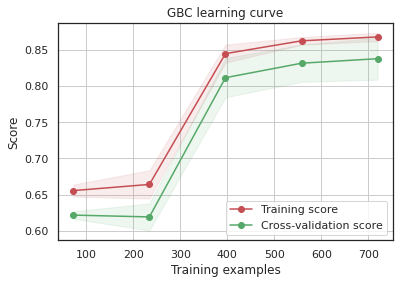

In [99]:
# Gradient boosting - Learning Curve 
plot_learning_curve(estimator = gsGBC.best_estimator_,title = "GBC learning curve",
                    X = X_train, y = Y_train, cv = K_fold);

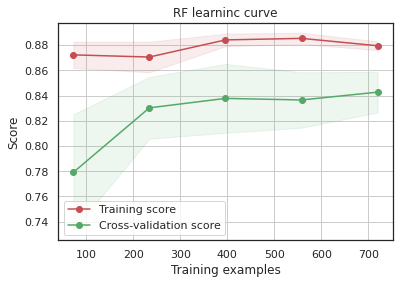

In [100]:
# Random Forest - Learning Curve
plot_learning_curve(estimator = gsRFC.best_estimator_ ,title = "RF learninc curve",
                    X = X_train, y = Y_train, cv = K_fold);

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

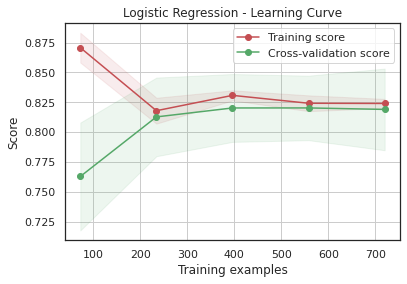

In [101]:
# Logistic Regression - Learning Curve    gsLRM.best_estimator_
plot_learning_curve(estimator = Log_Model ,title = "Logistic Regression - Learning Curve",
                    X = X_train, y = Y_train, cv = K_fold);

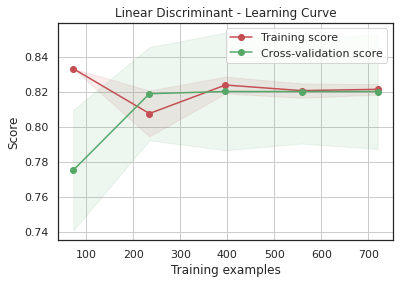

In [102]:
# Linear Discriminant Analysis - Learning Curve
plot_learning_curve(estimator = gsLDA.best_estimator_ ,title = "Linear Discriminant - Learning Curve",
                    X = X_train, y = Y_train, cv = K_fold);

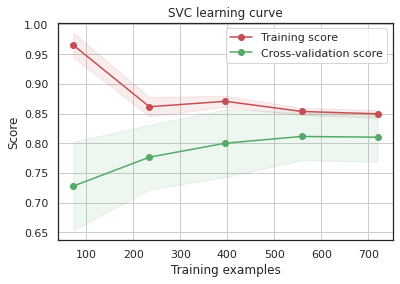

In [103]:
# Support Vector Machine - Learning Curve
plot_learning_curve(estimator = gsSVMC.best_estimator_,title = "SVC learning curve",
                    X = X_train, y = Y_train, cv = K_fold);

# Ensemble modeling

In [104]:
#about 84%
VotingPredictor = VotingClassifier(estimators =
                           [('rfc', RFC_best), 
                            ('gbc', GBC_best)],
                           voting='soft', n_jobs = 4)

# 82.97%
# VotingPredictor = VotingClassifier(estimators =
#                            [ ('rfc', RFC_best), 
#                             ('svc', SVMC_best),
#                             ('gbc', GBC_best),
#                             ('lda', LDA_best),
#                             ('lrm', LRM_best)],
#                            voting='soft', n_jobs = 4)

VotingPredictor = VotingPredictor.fit(X_train, Y_train)

scores = cross_val_score(VotingPredictor, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))

[0.80246914 0.825      0.825      0.875      0.8875     0.825
 0.825      0.775      0.875      0.85      ]
83.65


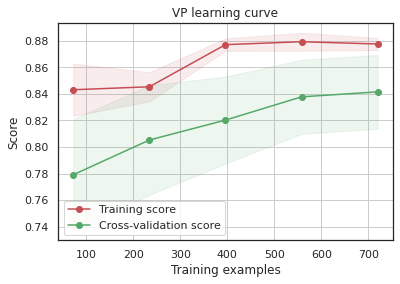

In [105]:
# Voting Predictor - Learning Curve
plot_learning_curve(estimator = VotingPredictor, title = "VP learning curve",
                    X = X_train, y = Y_train, cv = K_fold);

## Submit Predictor 

In [108]:
Predictive_Model = pd.DataFrame({
        "PassengerId": TestPassengerID,
        "Survived": VotingPredictor.predict(test_new)})

Predictive_Model.to_csv('number_1.csv', index=False)

In [109]:
# Let's look inside
submission = pd.read_csv('number_1.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
